In [56]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import *

In [57]:
from qutip import *

# Parameters

In [58]:
def chi(): 
    return g**2 / (delta * (delta + A)) * A

In [59]:
chi1 = 200 * 1e-6 # in units of Ghz
chi2 = 240 * 1e-6

alpha1 = 10 
alpha2 = 10

del_c1 = 10 * 1e-3  # Cavity drive detunings 
del_c2 = 10 * 1e-3

Omega_q = 10 * 1e-3

g12 = np.sqrt(chi1 * chi2) / 4 # cross kerr

In [60]:
g12

5.477225575051661e-05

In [61]:
chi1 * alpha1

0.002

In [79]:
n_q = 2
n_c = 70

#qutip ops
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c)

a_q = destroy(n_q)
a_c = destroy(n_c)

adag_q = create(n_q)
adag_c = create(n_c)

num_q = num(n_q)
num_c =  num(n_c)

In [80]:
def get_fidelity(state, target) : 
    def dot( state1, state2):
            '''
            dotting both states
            '''
            fid = state1.overlap(state2)
            return fid*np.conjugate(fid)
        
    if (state.type == 'ket') and (target.type == 'ket'):
        result = dot(state, target)

    elif (state.type == 'oper') and (target.type == 'ket'): #density matrix alert
        target_rho= target*target.dag()
        result = np.sqrt(dot(state, target_rho)) # Hilbert schmidt prod is enough, no need for squaring (try to do this for pure states and you'll get why sqrt used here)
    return result

In [81]:
def plot_populations_single_mode(output_states, figname, title, times_on_plot = None):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 10 # to be shown on the plot
    if times_on_plot is not None:
        times = times_on_plot
    
    #qubit grounded
    for i in range(max_num_levels):
        target = tensor(basis(n_q,0), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[0].plot(times, pops, label = '|g,'+str(i)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        target = tensor(basis(n_q,1), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i) +'>')

    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #plt.legend(fontsize = '15')
    #fig.suptitle(title, fontsize = 15)
    plt.tight_layout()
    #fig.savefig(figname, dpi = 1000)

In [82]:
def plot_populations_single_mode_plus_minus_basis(output_states, figname, title, times_on_plot = None):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 10 # to be shown on the plot
    if times_on_plot is not None:
        times = times_on_plot
        
    plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
    minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
    
    #qubit grounded (sigmax)
    for i in range(max_num_levels):
        target = tensor(plus, basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[0].plot(times, pops, label = '|+,'+str(i)+'>')
    
    #qubit excited (sigmax)
    for i in range(max_num_levels):
        target = tensor(minus, basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[1].plot(times, pops, linestyle = '--',  label = '|-,'+str(i) +'>')

    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #plt.legend(fontsize = '15')
    #fig.suptitle(title, fontsize = 15)
    plt.tight_layout()
    #fig.savefig(figname, dpi = 1000)

## Displaced Frame  + Hadamard Hamiltonian

$$ H =  \Delta_{c} a ^\dagger a  - \Omega_q \sigma_z/2 + \chi \alpha(a^\dagger +a)\sigma_x $$

In [120]:
del_c1 = 0.01
Omega_q = 0.01

In [121]:
H0 = (del_c1*tensor(identity_q, num_c) +
      -1* Omega_q * tensor(sigmaz(), identity_c)/2  + 
     chi1 * alpha1 * tensor(sigmax(), a_c + adag_c)
     )
     

H = [H0]
c_ops = []

In [122]:
#H0

In [123]:
times = np.linspace(0, 2000, 500)

psi0 = tensor(basis(n_q,1), basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

In [124]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)


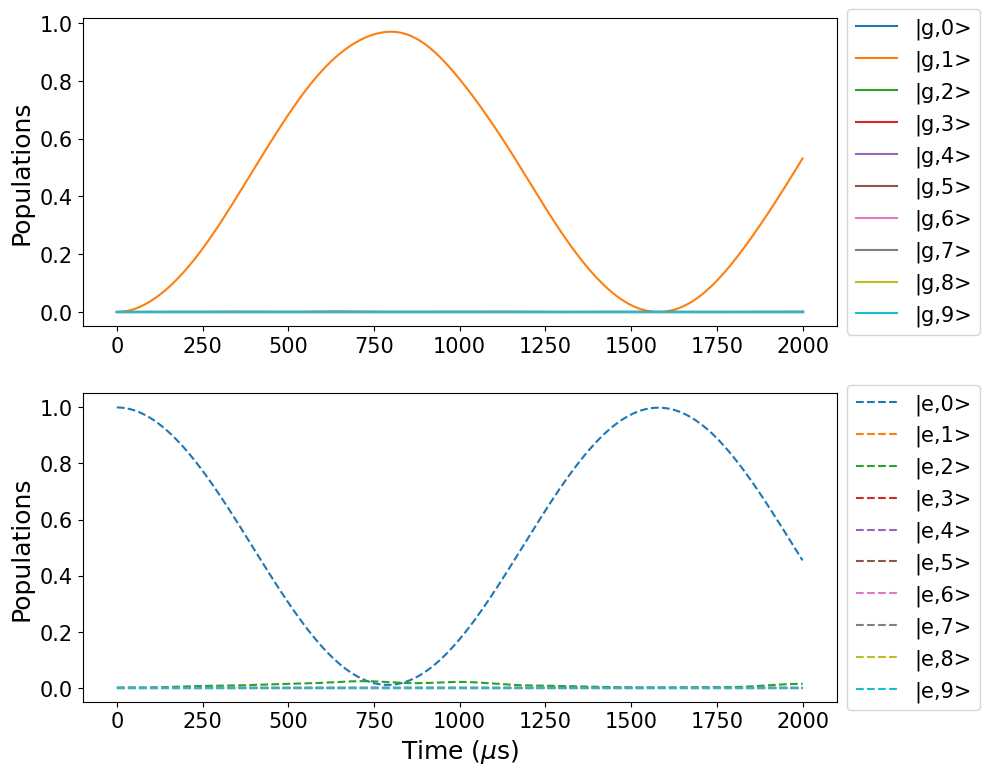

In [125]:
data = qload(states_filename)
plot_populations_single_mode(data, figname = 'test', title = None, times_on_plot = times)
plt.show()

## Displaced Frame  + Hadamard Hamiltonian (Parametric Modulation)

$$ H =  \Delta_{c} a ^\dagger a  - \epsilon sin(\Delta_c t) \sigma_z/2 + \chi \alpha(a^\dagger +a)\sigma_x $$

## Without DC Offset

In [179]:
epsilon = 0.3
del_c1 = 0.05
dc_offset = 0#0.3

In [180]:
H0 = (del_c1*tensor(identity_q, num_c) +
      -1* dc_offset * tensor(sigmaz(), identity_c)/2  + 
     chi1 * alpha1 * tensor(sigmax(), a_c + adag_c)
     )
     

#H = [H0]
c_ops = []

In [181]:
times = np.linspace(0, 4000, 1000)
sine = np.array([np.sin(del_c1*t) for t in times], dtype = np.single)


H = [H0, 
     [ -1*epsilon*tensor(sigmaz(), identity_c)/2 , sine]
    ]
#H0

In [182]:
psi0 = tensor(basis(n_q,1), basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
#states_filename = 'State_store_g0_g2_disp'
#qsave(output.states, states_filename)
rho = output.states[-1]

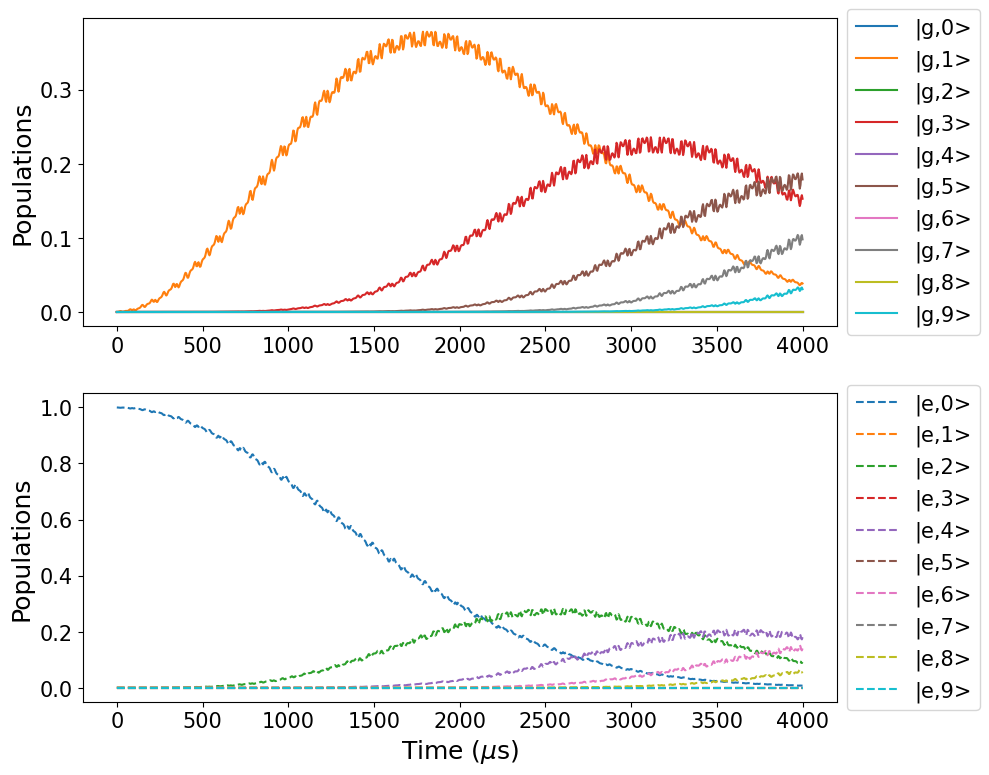

In [183]:
#data = qload(states_filename)
plot_populations_single_mode(output.states, figname = 'test_', title = None, times_on_plot = times)
plt.show()

Starting state is g0

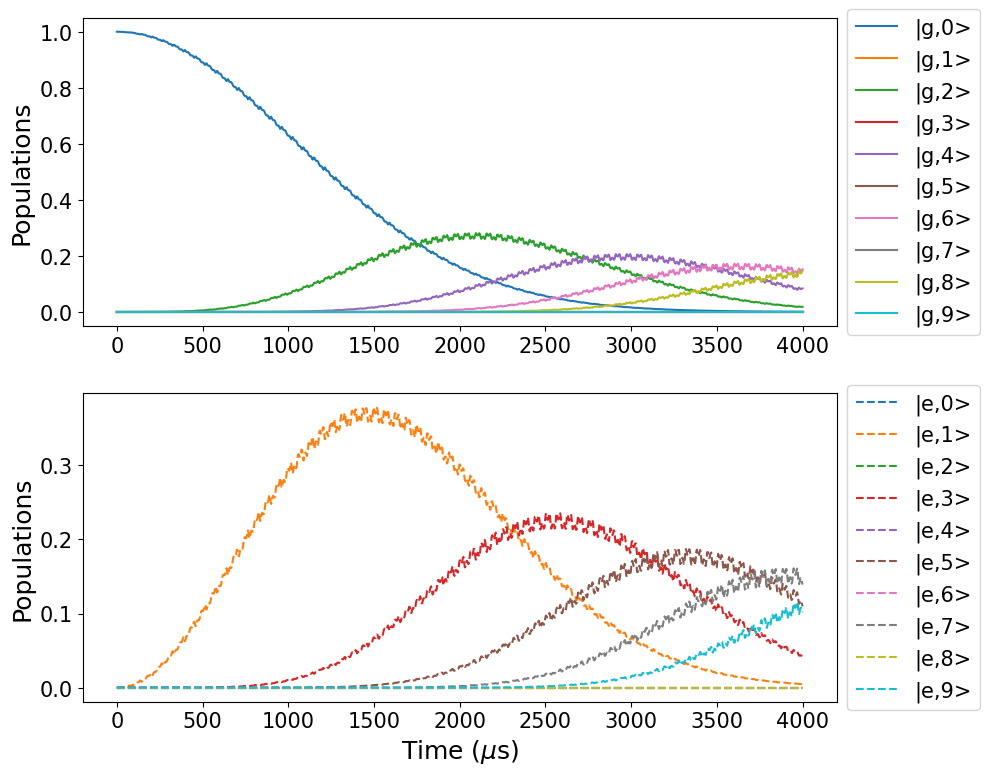

In [178]:
psi0 = tensor(basis(n_q,0), basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
#states_filename = 'State_store_g0_g2_disp'
#qsave(output.states, states_filename)
rho = output.states[-1]
#data = qload(states_filename)
plot_populations_single_mode(output.states, figname = 'test_', title = None, times_on_plot = times)
plt.show()

## With DC Offset 
This will help stop exciting t higher lying states

In [94]:
epsilon = 0.3
del_c1 = 0.1
dc_offset = 0.3#0.3

In [95]:
H0 = (del_c1*tensor(identity_q, num_c) +
      -1* dc_offset * tensor(sigmaz(), identity_c)/2  + 
     chi1 * alpha1 * tensor(sigmax(), a_c + adag_c)
     )
     

#H = [H0]
c_ops = []

In [96]:
times = np.linspace(0, 4000, 1000)
sine = np.array([np.sin(del_c1*t) for t in times], dtype = np.single)


H = [H0, 
     [ -1*epsilon*tensor(sigmaz(), identity_c)/2 , sine]
    ]
#H0

In [97]:
psi0 = tensor(basis(n_q,1), basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
#states_filename = 'State_store_g0_g2_disp'
#qsave(output.states, states_filename)
rho = output.states[-1]

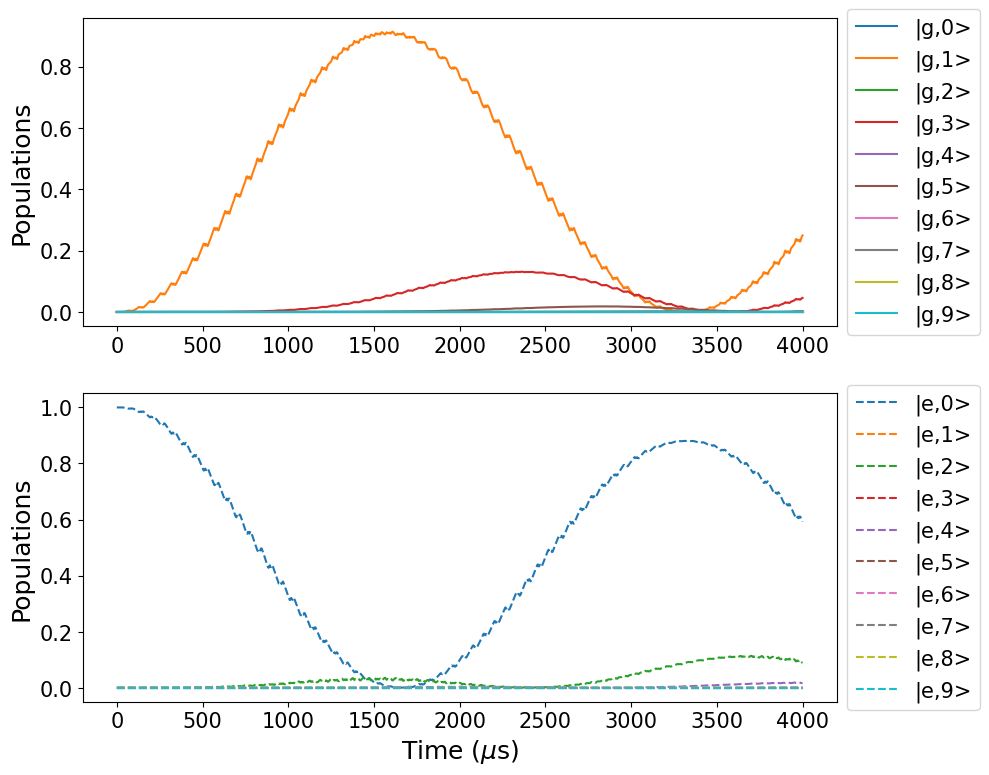

In [98]:
#data = qload(states_filename)
plot_populations_single_mode(output.states, figname = 'test_', title = None, times_on_plot = times)
plt.show()

#### Sweep over frequencies to produce chevron plot (need to update parameters)

In [178]:
# sweep over frequencies and collect population data of g1 and e0 state
def evolve_and_get_pop(omega):
    '''
    combines state population at the particular modulation frequency and returns pops 
    '''

    
    H0 = (del_c1*tensor(identity_q, num_c) + 
     2*chi1 * alpha1 * tensor(sigmax(), a_c + adag_c)
     )
    c_ops = []

    times = np.linspace(0, 8000, 2000)
    sine = np.array([np.sin(omega*t) for t in times], dtype = np.single)
    
    
    H = [H0, 
         [ -1*epsilon*tensor(sigmaz(), identity_c)/2 , sine]
        ]

    #evolution
    psi0 = tensor(basis(n_q,1), basis(n_c,0))
    opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
    output = mesolve(H, psi0 , times, c_ops, [], options =opts)

    #compute populations 
    targets =[tensor(basis(n_q,1), basis(n_c, 0)), tensor(basis(n_q,0), basis(n_c, 1))]# e0 and g1 
    targ_pops = [[np.abs(target.overlap(output.states[k]))**2 for k in range(len(times))]for target in targets]
    return targ_pops
    

In [193]:
omegas=np.linspace(0.95, 1.05, 50) * del_c1
pops_vs_omega = [evolve_and_get_pop(omega) for omega in omegas]

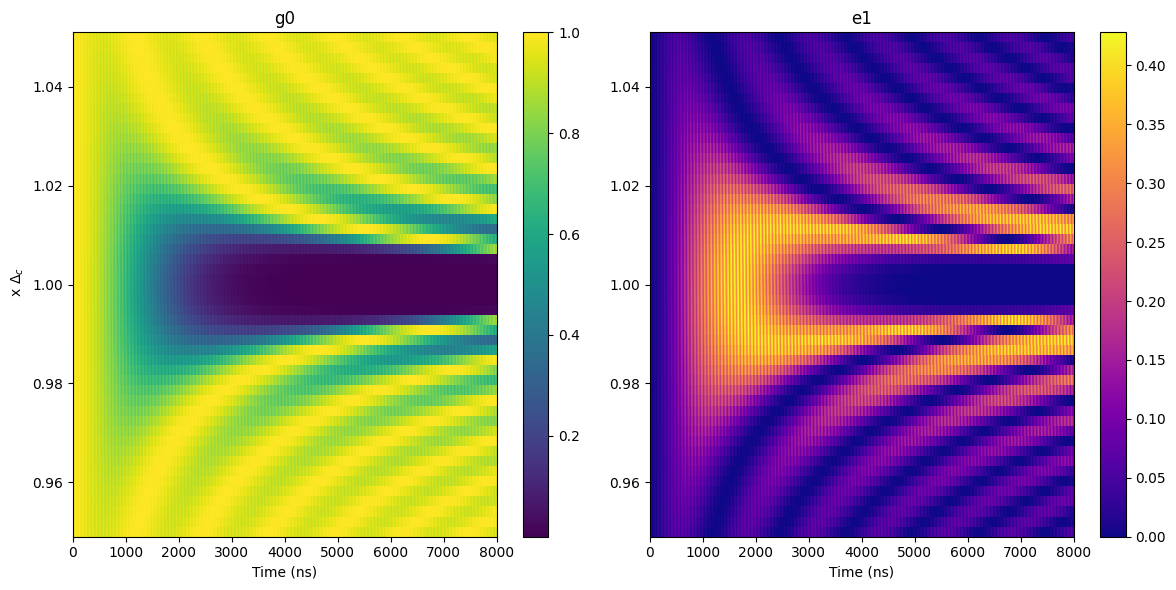

In [197]:
# Generate some random data for demonstration
times = np.linspace(0, 8000, 2000)
x = times
y = omegas/del_c1
X, Y = np.meshgrid(x, y)
Z1 = np.transpose(pops_vs_omega, axes=[1,0,2])[0]
Z2 = np.transpose(pops_vs_omega, axes=[1,0,2])[1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot data on the first subplot
pcm1 = axs[0].pcolormesh(X, Y, Z1, cmap='viridis')
axs[0].set_title('g0')
plt.colorbar(pcm1, ax=axs[0])

# Plot data on the second subplot
pcm2 = axs[1].pcolormesh(X, Y, Z2, cmap='plasma')
axs[1].set_title('e1')
axs[1].set_xlabel('Time (ns)')
axs[0].set_xlabel('Time (ns)')
axs[0].set_ylabel(' x $\Delta_c$')
plt.colorbar(pcm2, ax=axs[1])

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

# Now just  Displaced + Rotating Frame (removing hadamard)
$$ H =  \Delta_{c} a ^\dagger a  + \Omega_q \sigma_x/2 - \chi \alpha(a^\dagger + a)\sigma_z $$

In [1033]:
alpha = 5
H0 = (del_c1*tensor(identity_q, num_c) +
      +1* Omega_q * tensor(sigmax(), identity_c)/2  + 
     -1* chi1 * alpha * tensor(sigmaz(), a_c + adag_c)
     )
     

H = [H0]
c_ops = []

In [1040]:
times = np.linspace(0, 2000, 2000, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
psi0 = tensor(minus, basis(n_c,1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

In [1045]:
target = tensor(plus, basis(n_c, 0))
get_fidelity(rho, target)

(0.8221299278241198+0j)

In [1043]:
len(output.states)

2000

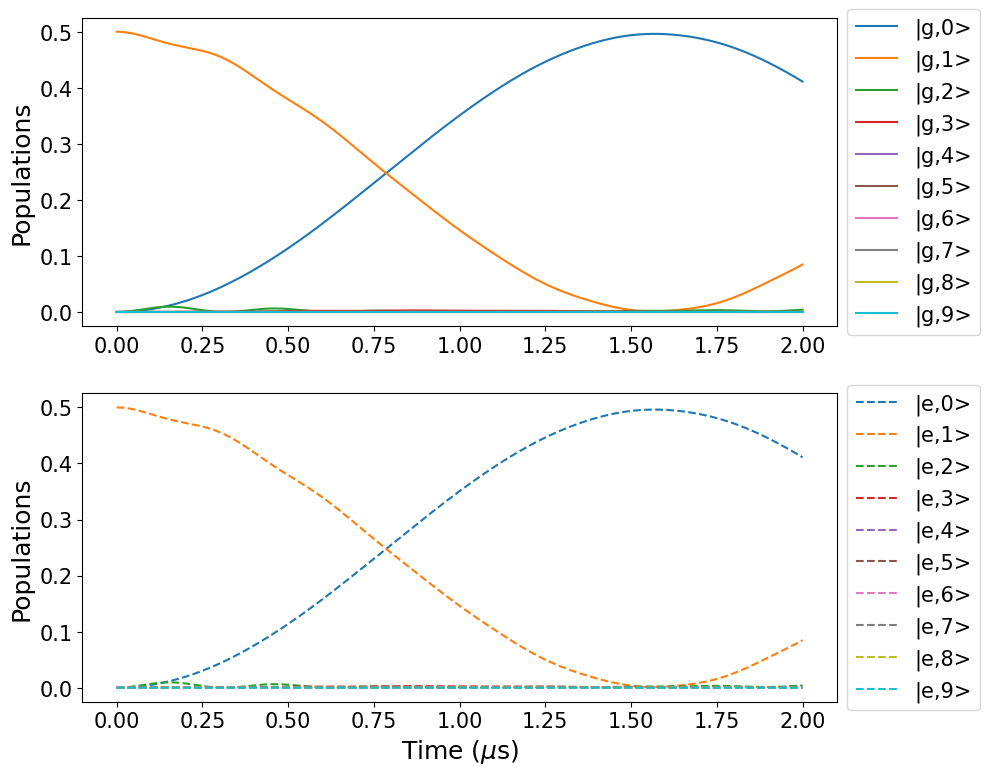

In [1044]:
data = qload(states_filename)
plot_populations_single_mode(data, figname = 'test', title = None, times_on_plot = times/1000)
plt.show()

#  Displaced + Rotating Frame (removing hadamard) (Parametric Modulation)
$$ H =  \Delta_{c} a ^\dagger a  + \epsilon sin(\Delta_c t) \sigma_x/2  - \chi \alpha(a^\dagger + a)\sigma_z $$

In [101]:
alpha = 10
epsilon = 0.1
del_c1 = 0.02
dc_offset = 0.1

H0 = (del_c1*tensor(identity_q, num_c) +
      +1* dc_offset* tensor(sigmax(), identity_c)/2  + 
     -1* chi1 * alpha * tensor(sigmaz(), a_c + adag_c)
     )
c_ops = []

In [104]:
times = np.linspace(0, 4000, 2000)
H = [H0, 
     [ epsilon*tensor(sigmax(), identity_c) /2,  np.array([np.sin(del_c1*t) for t in times], dtype = np.single)]
    ]

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
psi0 = tensor(plus, basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

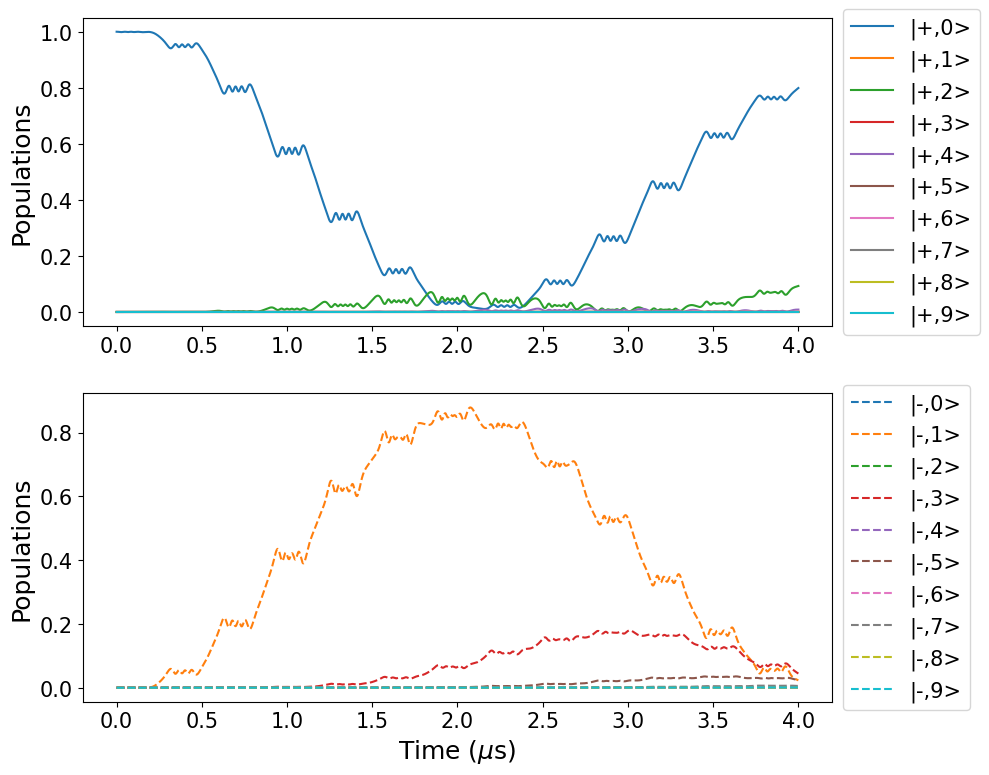

In [105]:
data = qload(states_filename)
plot_populations_single_mode_plus_minus_basis(data, figname = 'test', title = None, times_on_plot = times/1000)
plt.show()

# Full enhanced dispersive interaction 
$$ H =  \Delta_{c} a ^\dagger a  + \Omega_q \sigma_x/2 - \chi \alpha(a^\dagger + a)\sigma_z  - \chi|\alpha|^2 \sigma_z - \chi a^\dagger a \sigma_z$$

In [91]:
alpha = 5
Omega_q = 0.1
del_c1 = 0.1
#dc_offset = 0.1

H0 = (del_c1*tensor(identity_q, num_c) +
      +1* Omega_q* tensor(sigmax(), identity_c)/2  + 
     -1*chi1 * alpha * tensor(sigmaz(), a_c + adag_c) + 
     -1 * chi1 *  alpha * alpha * tensor(sigmaz(), identity_c)  
     -1 * chi1 * tensor(sigmaz(), num_c)
     )
H = [H0]  
c_ops = []

In [92]:
times = np.linspace(0, 4000, 2000)


plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
psi0 = tensor(plus, basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

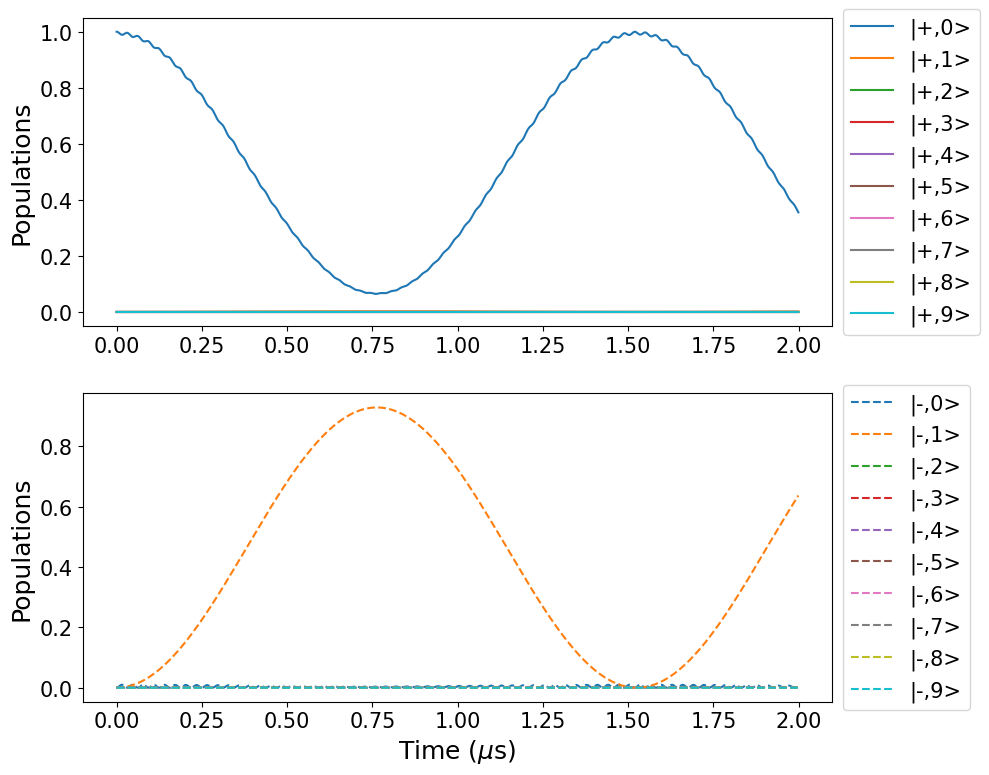

In [93]:
data = qload(states_filename)
plot_populations_single_mode_plus_minus_basis(data, figname = 'test', title = None, times_on_plot = None)
plt.show()

In [710]:
1/(chi1 * alpha * alpha)

200.0

In [690]:
1/0.03

33.333333333333336

In [691]:
chi1 * alpha1* alpha1

0.02

dominant term is the ac stark shift of the qubit which stops the swaps from happening. Why?

# Full enhanced dispersive interaction with Parametric Modulation
$$ H =  \Delta_{c} a ^\dagger a  + \epsilon \sin(\Delta_c t) \sigma_x/2 - \chi \alpha(a^\dagger + a)\sigma_z  - \chi|\alpha|^2 \sigma_z - \chi a^\dagger a \sigma_z$$


In [85]:
alpha = 10
epsilon = 0.1
del_c1 = 0.02
dc_offset = 0.1

H0 = (del_c1*tensor(identity_q, num_c) +
     # +1* dc_offset * tensor(sigmax(), identity_c)/2  + 
     -1*chi1 * alpha * tensor(sigmaz(), a_c + adag_c) + 
    1* -1 * chi1 *  alpha * alpha * tensor(sigmaz(), identity_c)  +
     -1 * chi1 * tensor(sigmaz(), num_c)
     )
     

c_ops = []

times = np.linspace(0, 4000, 2000)
H = [H0, 
     [ epsilon*tensor(sigmax(), identity_c) /2,  np.array([np.sin(del_c1*t) for t in times], dtype = np.single)]
    ]

In [86]:
psi0 = tensor(plus, basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

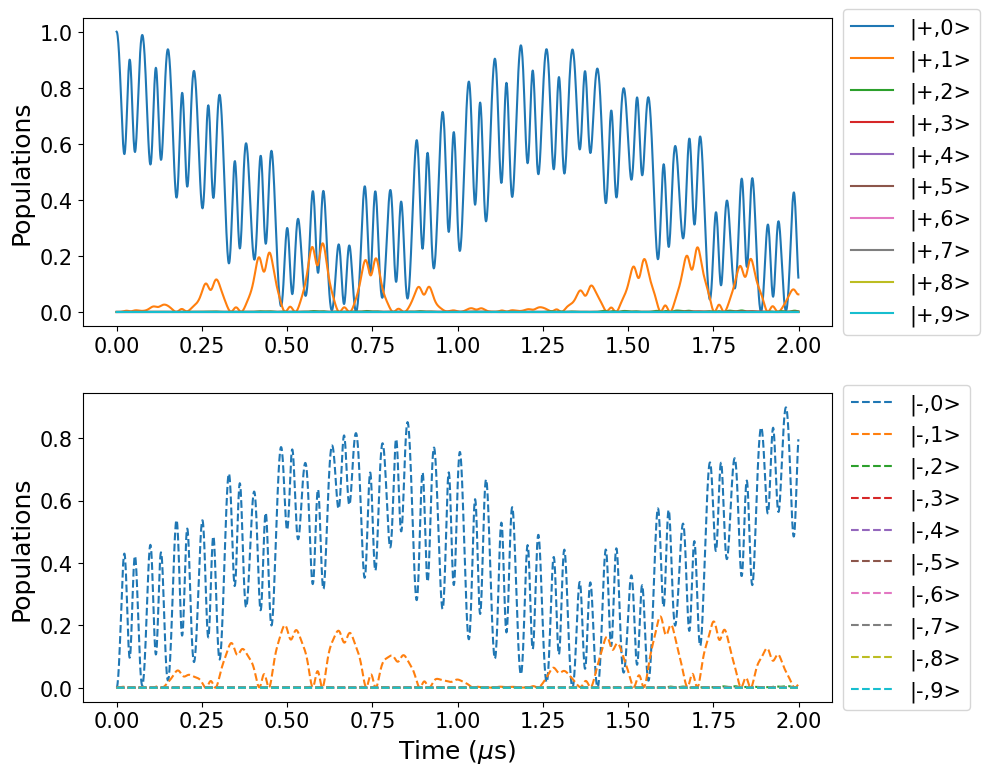

In [87]:
data = qload(states_filename)
plot_populations_single_mode_plus_minus_basis(data, figname = 'test', title = None, times_on_plot = None)
plt.show()

**Lesson**: Need qubit drive to be detuned by $\chi |\alpha|^2$ 

# Displaced+ Rotating frame with resonant cavity drive and no qubit drive
$$ H =   - \chi \alpha(a^\dagger + a)\sigma_z $$

In [819]:
alpha = 5
H0 = (#del_c1*tensor(identity_q, num_c) +
      #+1* Omega_q * tensor(sigmax(), identity_c)/2  + 
     -1*chi1 * alpha * tensor(sigmaz(), a_c + adag_c)
     )
     

H = [H0]
c_ops = []

In [820]:
times = np.linspace(0, 20000, 20000, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
psi0 = tensor(plus, basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

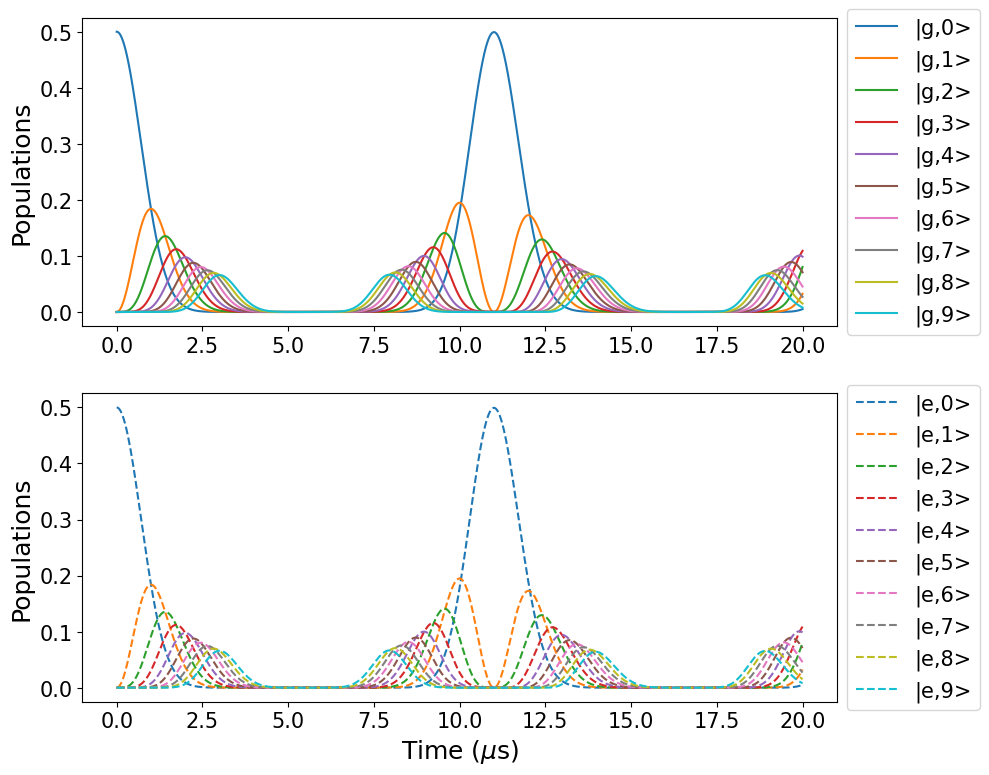

In [821]:
data = qload(states_filename)
plot_populations_single_mode(data, figname = 'test', title = None)
plt.show()

In this case, squeezing interactions also becoming resonant which is why we are getting cavity mode excitations. Note how we also hit the cavity mode upper ceiling

In [810]:
# target = tensor(plus, basis(n_c, 0))
# ts = np.linspace(0, len(output.states), len(output.states))
# fids = []
# for idx, t in enumerate(ts):
#     fids.append(get_fidelity(output.states[idx], target))

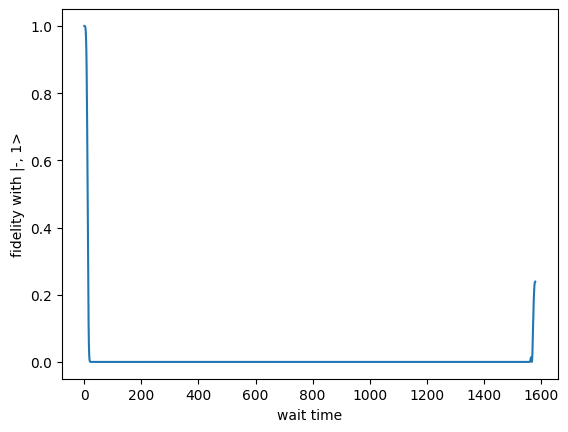

In [811]:
plt.plot(ts, fids)
plt.ylabel('fidelity with |-, 1>')
plt.xlabel('wait time')
plt.show()

# Displaced+ Rotating frame with resonant cavity drive and no qubit drive (only beamplitter in hadamard frame)
$$ H =   \chi \alpha(a^\dagger \sigma^- + a\sigma^+)$$

In [884]:
alpha = 5
H0 = (#del_c1*tensor(identity_q, num_c) +
      #+1* Omega_q * tensor(sigmax(), identity_c)/2  + 
     chi1 * alpha * tensor(a_q, adag_c) + 
    chi1 * alpha1 * tensor(adag_q, a_c)
     )
     

H = [H0]
c_ops = []

In [893]:
times = np.linspace(0, 20000, 20000, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
psi0 = tensor(e_state, basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

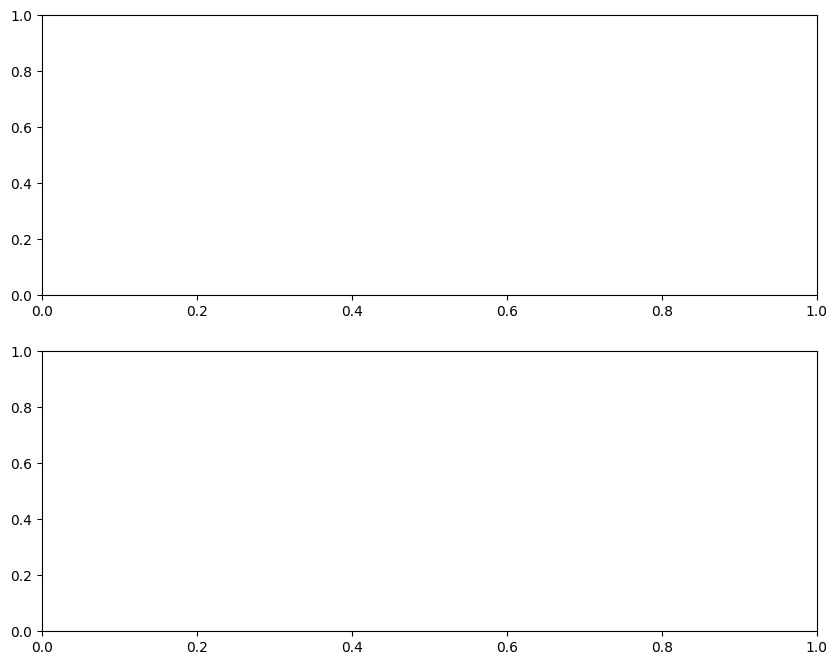

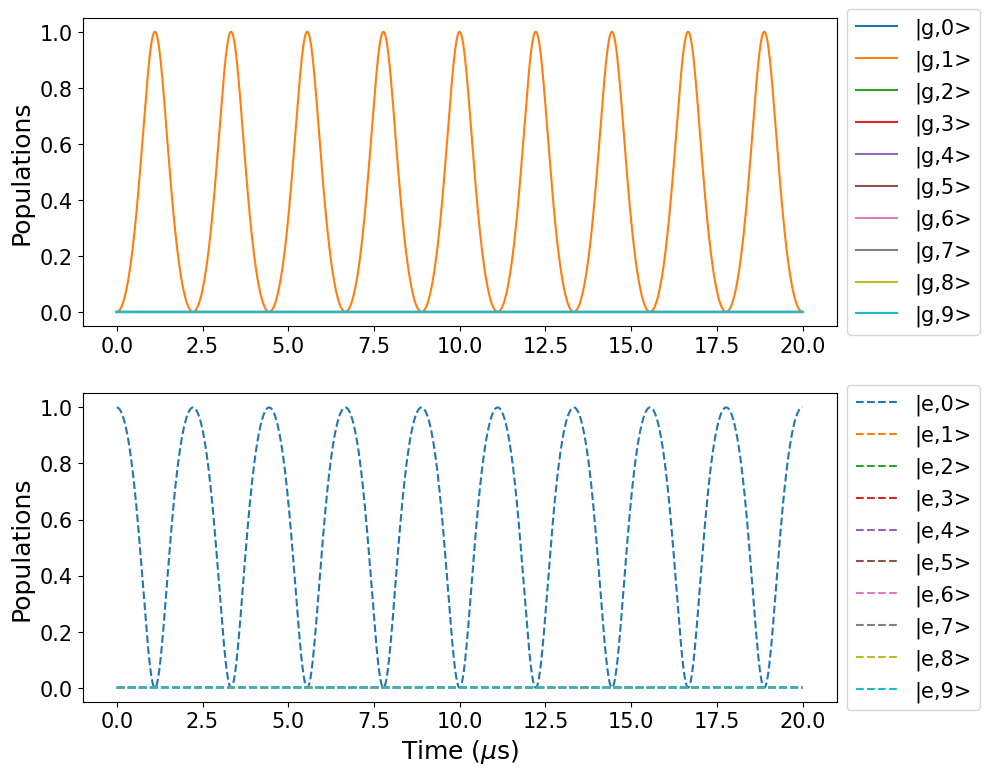

In [894]:
data = qload(states_filename)
plot_populations_single_mode(data, figname = 'test', title = None, times_on_plot = None)
plt.show()

So we need the detuning and the qubit frequency to make squeezing terms non-resonant

# Factoring in rotating component of alpha
$$ H =  \Delta_{c} a ^\dagger a  + \Omega_q \sigma_x/2 - \chi (\alpha a^\dagger + \alpha^\star a)\sigma_z $$
$$\alpha = \alpha_0 e^{-i\Delta_c t}$$

Not yet done

In [2]:
# alpha = 5
# H0 = (del_c1*tensor(identity_q, num_c) +
#       +1* Omega_q * tensor(sigmax(), identity_c)/2  + 
#      -1*chi1 * alpha * tensor(sigmaz(), a_c + adag_c) + 
#      -1 * chi1 *  alpha * alpha * tensor(sigmaz(), identity_c)  
#      -1 * chi1 * tensor(sigmaz(), num_c)
#      )
     

# H = [H0]
# c_ops = []

In [3]:
# times = np.linspace(0, 2000, 2000, dtype = np.int32)

# plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
# psi0 = tensor(plus, basis(n_c,0))
# opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
# output = mesolve(H, psi0 , times, c_ops, [], options =opts)
# states_filename = 'State_store_g0_g1_disp'
# qsave(output.states, states_filename)
# rho = output.states[-1]

In [4]:
# data = qload(states_filename)
# plot_populations_single_mode(data, figname = 'test', title = None, times_on_plot = None)
# plt.show()

# Not Displaced Frame

## Cavity Drive

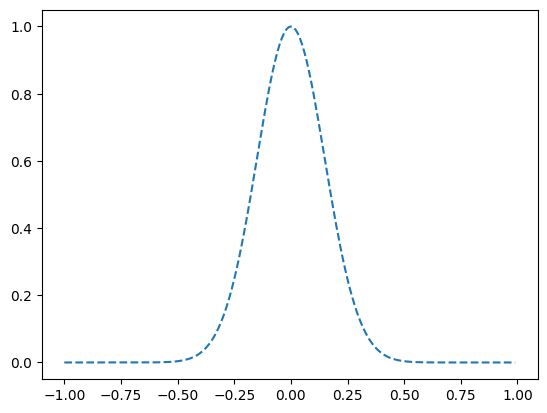

In [11]:
# cavity drive 

t = np.linspace(-1, 1, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)
plt.plot(t, e, '--')
plt.show()

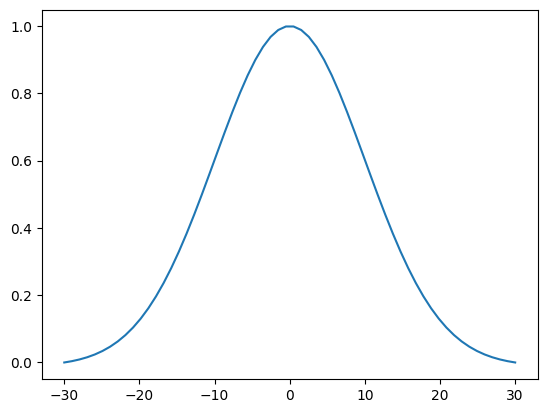

In [12]:
def gaussian_wave(sigma = 10, chop=4):
    '''source: Alec ECD'''
    ts = np.linspace(-chop / 2 * sigma, chop / 2 * sigma, chop * sigma)
    P = np.exp(-(ts**2) / (2.0 * sigma**2))
    ofs = P[0]
    return ts, (P - ofs) / (1 - ofs)

ts, pulse = gaussian_wave(10, 6)
plt.plot(ts, pulse)
plt.show()

In [13]:
#normalize 
from scipy.integrate import quad

def gaussian(t, amp = 1):
    '''
    returns a point sampled from a gaussian centered at t = 20
    '''
    sigma = 10
    chop = 4
    ts = np.linspace(-chop / 2 * sigma, chop / 2 * sigma, chop * sigma)
    Ps = amp * np.exp(-((ts)**2) / (2.0 * sigma**2))
    ofs = Ps[0]
    
    p = amp * np.exp(-((t-20)**2) / (2.0 * sigma**2))
    
    p = (p - ofs) / (1 - ofs)
    #print(ofs)
    return p

area = integrate.quad(gaussian, 0, 40 )[0] 

def norm_gaussian_wave(t, omega_d):
    '''
    returns a point sampled from a gaussian centered at t = 20
    with sinusodial component modulating at omega d
    '''
 
    p = gaussian(t, amp = 1/area)
    
    return p * np.exp(1.0j * omega_d * t) # add 2 pi later

In [14]:
norm_gaussian_wave(0, 0)

0j

c:\Users\Eesh Gupta\anaconda\envs\base_stanford\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Eesh Gupta\anaconda\envs\base_stanford\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


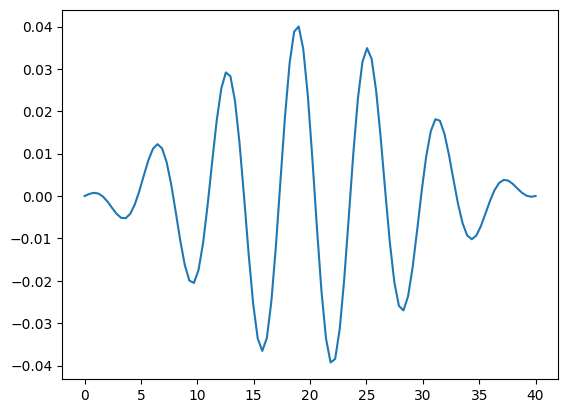

In [15]:
ts = np.linspace(0, 40, 100)
plt.plot(ts, norm_gaussian_wave(ts, 100*del_c1))
plt.show()

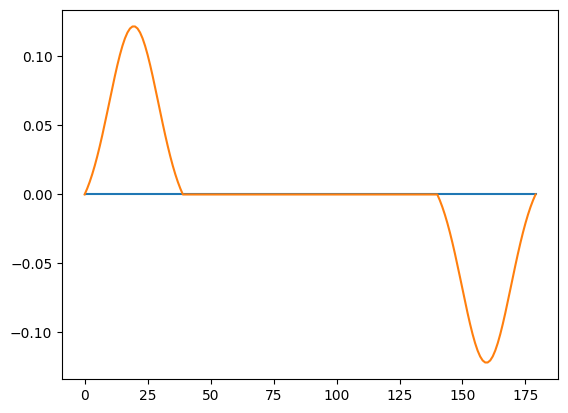

In [16]:
# cavity drive 
def cavity_drive(alpha = 2, omega_d = 0 , tw = 100):
    '''
    tw is wait time 
    pulse pattern - displace - wait - displace back
    '''

    ts = np.linspace(0, 40, 40)
    wave =  1.0j * alpha * norm_gaussian_wave(ts, omega_d)

    # pulse pattern - displace - wait - displace back
    disp = wave.copy()
    wait = np.array([0 for i in range(tw)])
    disp_back = -1 * wave.copy()
    pulse = np.concatenate((disp, wait, disp_back))
    return pulse 
pulse = cavity_drive(alpha = 3)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

In [17]:
def alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha = np.zeros_like(epsilon_array)
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    -1j * delta * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    - 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

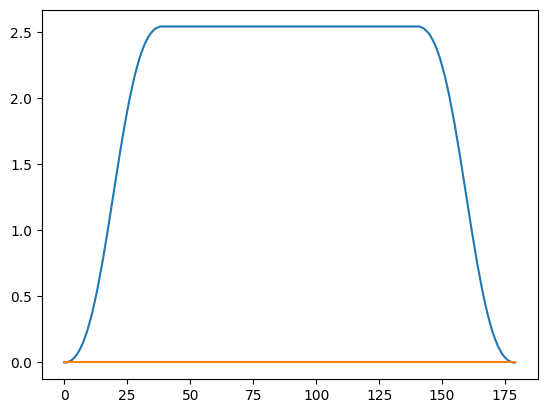

In [18]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.show()

# Rotating frame with resonant cavity drive and detuned qubit 
$$ H =   \Delta_q \sigma_z /2 + \chi a^\dagger a \sigma_z + (\epsilon(t) a^\dagger + h.c.)$$
where detuning is the AC stark shift from the cavity drive

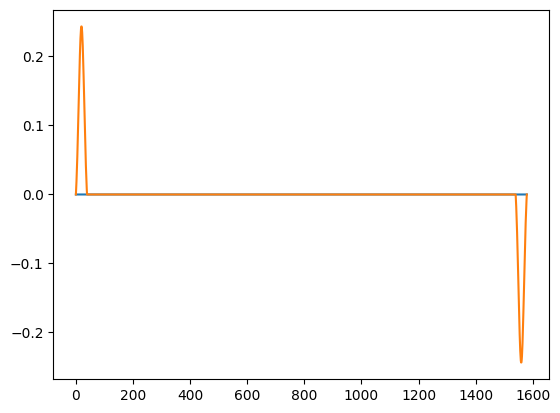

In [793]:
omega_c = 0
omega_q = 0
pulse = cavity_drive(alpha = 6, omega_d = 1 * omega_c, tw = 1500)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

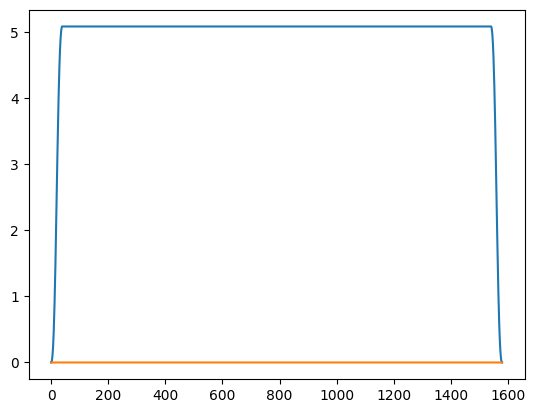

In [794]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.show()

In [795]:
omega_q = -1 * chi1 * max(alpha)**2

H0 = (omega_c * tensor(identity_q, num_c) + 
      -1 * omega_q * tensor(sigmaz(), identity_c )+
     -1 * chi1 * tensor(sigmaz(), num_c) 
)
# adding time dependent
H = [
    H0, 
    [tensor(identity_q, adag_c), pulse], 
    [tensor(identity_q, a_c), np.conjugate(pulse)]
]

In [796]:
-1 * chi1 * max(alpha) * max(alpha)

(-0.005179913179398418+0j)

In [797]:
chi1

0.00019999999999999998

In [798]:
len(pulse)

1580

In [799]:
T = len(pulse)
times = np.linspace(0, T, T)#, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(plus, basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

In [800]:
rho

Quantum object: dims = [[2, 30], [1, 1]], shape = (60, 1), type = ket
Qobj data =
[[ 0.34556784-0.15436643j]
 [ 0.29722895+0.19877754j]
 [-0.23223535-0.0464631j ]
 [-0.04708639-0.28167727j]
 [ 0.09518645+0.13113266j]
 [-0.08102742+0.15096429j]
 [ 0.00831914-0.11265917j]
 [ 0.07040227-0.04757809j]
 [-0.04436255+0.0672861j ]
 [-0.03285685+0.00793184j]
 [ 0.04428016-0.03739249j]
 [ 0.00679408+0.00416166j]
 [-0.03442737+0.02203502j]
 [ 0.00838859-0.00911749j]
 [ 0.0226093 -0.01244713j]
 [-0.01648069+0.01141559j]
 [-0.01011417+0.00457171j]
 [ 0.01833083-0.01096425j]
 [-0.00152278+0.00191589j]
 [-0.01414691+0.0076743j ]
 [ 0.00965526-0.00592767j]
 [ 0.00545788-0.00248306j]
 [-0.01196755+0.00654681j]
 [ 0.00444407-0.00277673j]
 [ 0.00850027-0.00416493j]
 [-0.01139029+0.00607438j]
 [-0.00266621+0.00085639j]
 [ 0.01192798-0.00602174j]
 [-0.00068008+0.00076149j]
 [-0.00515863+0.00253447j]
 [ 0.34556784+0.15436643j]
 [ 0.29722895-0.19877754j]
 [-0.23223535+0.0464631j ]
 [-0.04708639+0.28167727j]


In [801]:
target = tensor(plus, basis(n_c, 0))
get_fidelity(rho, target)

(0.23883426889643808+0j)

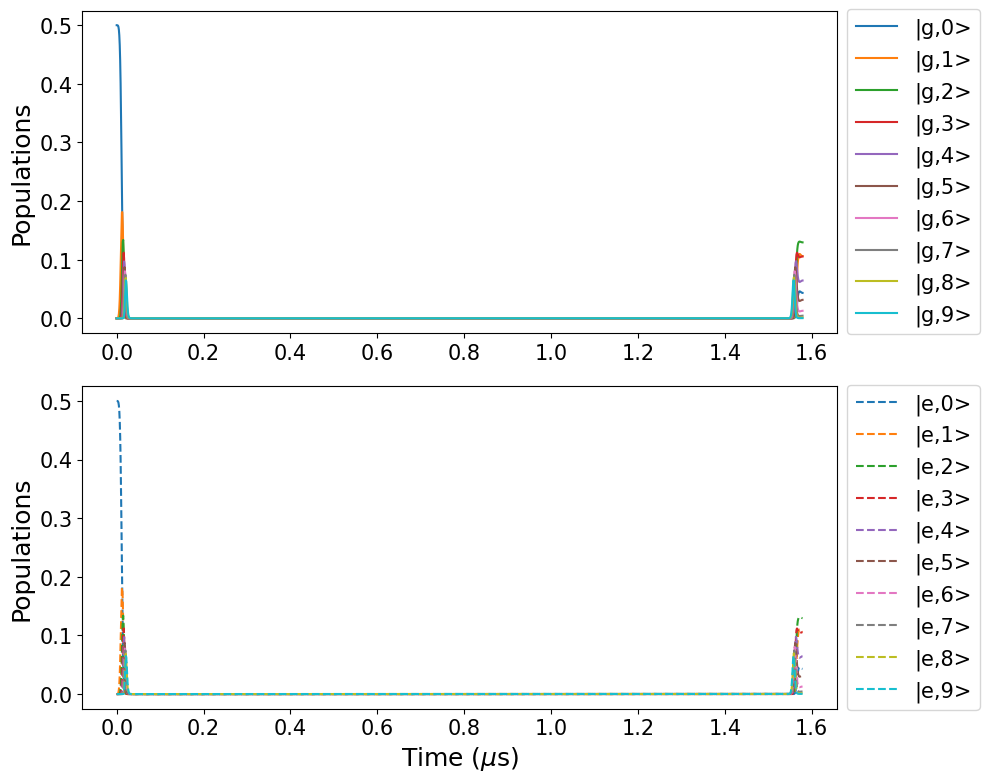

In [764]:
data = qload(states_filename)
plot_populations_single_mode(data, figname = 'test', title = None, max_num_levels = 10)
plt.tight_layout()
plt.show()

In [812]:
def vary_tw(tws, target): 
    
    #fids = []
    states = []
    
    for tw in tws:
        # create pulse
        pulse = cavity_drive(alpha = 6, omega_d = 1 * omega_c, tw = tw)

        # ------------------------- Hamiltonian 
        omega_q = -1 * chi1 * max(alpha)**2

        H0 = (omega_c * tensor(identity_q, num_c) + 
              -1 * omega_q * tensor(sigmaz(), identity_c )+
             -1 * chi1 * tensor(sigmaz(), num_c) 
        )
        # adding time dependent
        H = [
            H0, 
            [tensor(identity_q, adag_c), pulse], 
            [tensor(identity_q, a_c), np.conjugate(pulse)]
        ]
    
        # SOlve Master equation 
        T = len(pulse)
        times = np.linspace(0, T, T)#, dtype = np.int32)

        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
        minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
        e_state = basis(n_q, 1)
        g_state = basis(n_q, 0)

        psi0 = tensor(plus, basis(n_c,0))
        opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
        output = mesolve(H, psi0 , times, c_ops, [], options =opts)
        states_filename = 'State_store_g0_g1_disp'
        qsave(output.states, states_filename)
        rho = output.states[-1]
        
        # find fidelity 
        #fids.append(get_fidelity(rho, target))
        states.append(rho)
    return states
        

In [817]:
target = tensor(minus, basis(n_c, 1))
tws = np.linspace(100, 20000, 200, dtype = np.int32)
# fids = vary_tw(tws, target)
states = vary_tw(tws, target)

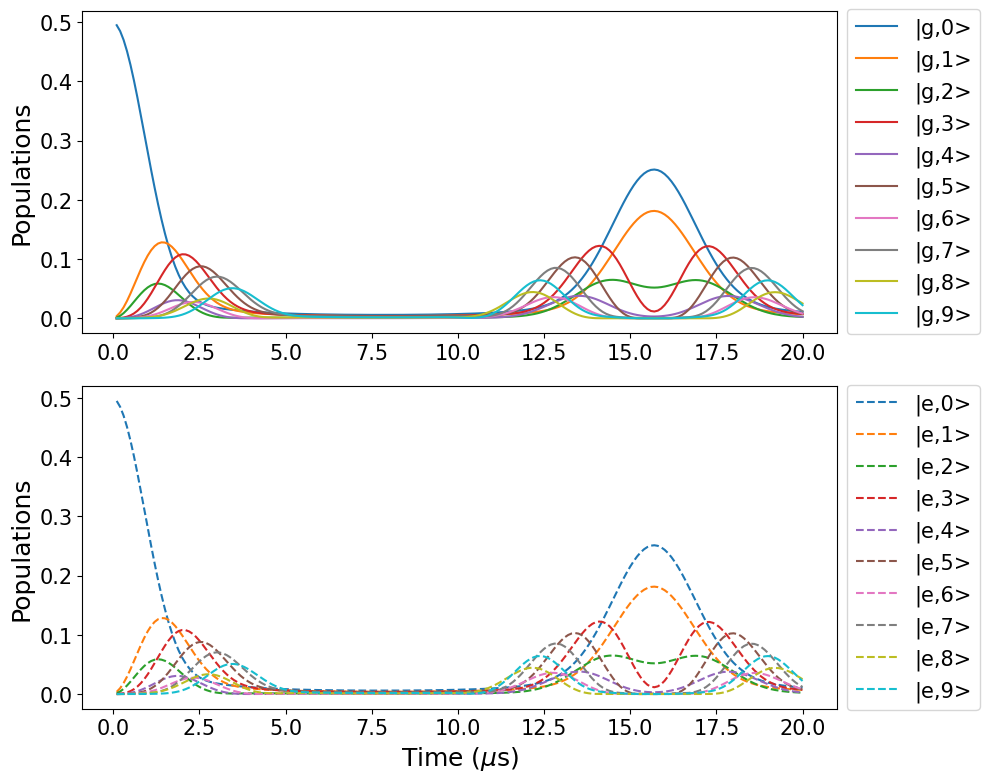

In [823]:
plot_populations_single_mode(states, figname = 'test', title = None, times_on_plot = tws/1000)
plt.tight_layout()
plt.show()

# Adding Cavity Drive detuning and qubit drive to non-displaced frame
$$ H =  \Delta_c a^\dagger a  + \Delta_q \sigma_z /2 + \chi a^\dagger a \sigma_z + (\epsilon(t) a^\dagger + h.c.) + \Omega_q /2 \sigma_x$$
where detuning is the AC stark shift from the cavity drive

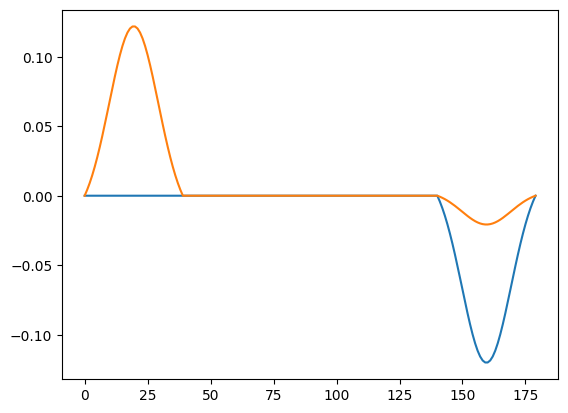

In [88]:
def cavity_drive(alpha = 2, omega_d = 0 , tw = 100, delta = 0):
    '''
    tw is wait time 
    pulse pattern - displace - wait - displace back
    '''

    ts = np.linspace(0, 40, 40)
    wave =  1.0j * alpha * norm_gaussian_wave(ts, omega_d)

    # pulse pattern - displace - wait - displace back
    disp =  wave.copy()
    wait = np.array([0 for i in range(tw)])
    disp_back =  -1 * np.exp(-1.0j * del_c1 * (tw + len(disp)))*wave.copy()
    pulse = np.concatenate((disp, wait, disp_back))
    return pulse 
pulse = cavity_drive(alpha = 3)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

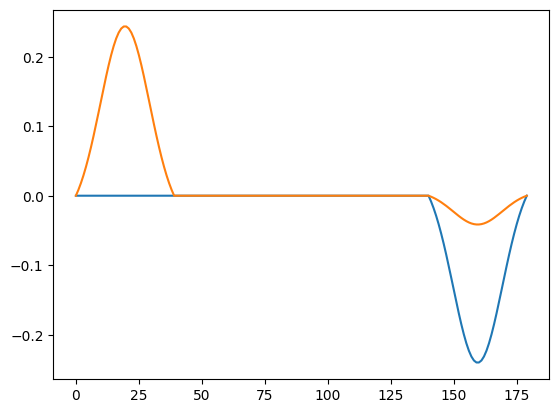

In [94]:
omega_c = 0
omega_q = 0
pulse = cavity_drive(alpha = 6, omega_d = 1 * omega_c, tw = 100, delta = del_c1)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

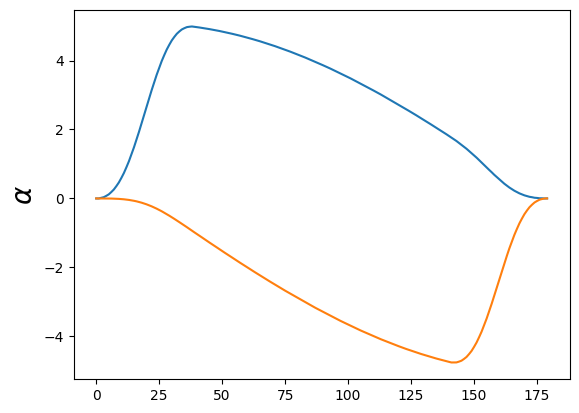

In [95]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse, delta =del_c1)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.ylabel(r'$\alpha$', fontsize = 20)
plt.show()

In [1031]:
del_q = chi1 * alpha * np.conjugate(alpha)

H0 = (del_c1 * tensor(identity_q, num_c) + 
       #del_q * tensor(sigmaz(), identity_c )+ # ac stark shift 
     -1 * chi1 * tensor(sigmaz(), num_c) +
      -1*Omega_q * tensor(sigmax(), identity_c)/2
)
# adding time dependent
H = [
    H0, 
    [tensor(identity_q, adag_c), pulse], 
    [tensor(identity_q, a_c), np.conjugate(pulse)], 
    [tensor(sigmaz(), identity_c ), del_q] # oscillating ac stark shift 
]

# SOlve Master equation 
T = len(pulse)
times = np.linspace(0, T, T)#, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(plus, basis(n_c,1))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

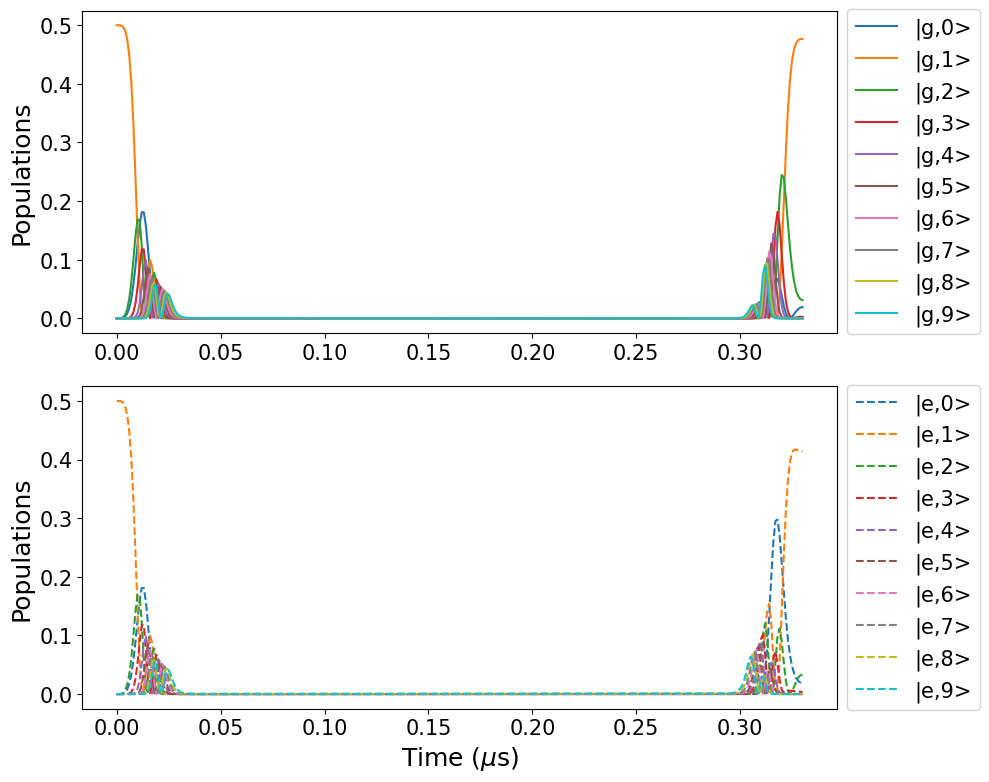

In [1032]:
data = qload(states_filename)
plot_populations_single_mode(data, figname = 'test', title = None, times_on_plot = times/1000)
plt.tight_layout()
plt.show()

In [1021]:
alpha[-1]

(0.00034503812299538014+0.0003154357614958102j)

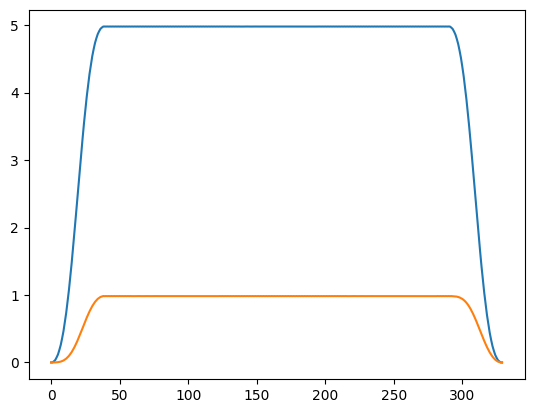

In [1022]:
#alpha in rotating frame
rot_alpha =np.array( [alpha[i] * np.exp(1.0j * Omega_q * i) for i in range(len(alpha))])
plt.plot(rot_alpha.real)
plt.plot(rot_alpha.imag)
plt.show()

In [1023]:
np.angle(alpha[-1])

0.7406082570972213

In [1024]:
np.abs(alpha[-100])

5.075360496315154

In [1025]:
np.angle(np.exp(-1.0j * del_c1 * 210))

-2.1

In [1046]:
def vary_tw(tws, target): 
    
    #fids = []
    states = []
    
    for tw in tws:
        # create pulse
        pulse = cavity_drive(alpha = 6, omega_d = 1 * omega_c, tw = tw, delta= del_c1)
        alpha =  alpha_from_epsilon_nonlinear_finite_difference(pulse, delta = del_c1)

        # ------------------------- Hamiltonian 
        del_q = chi1 * alpha * np.conjugate(alpha)

        H0 = (del_c1 * tensor(identity_q, num_c) + 
               #del_q * tensor(sigmaz(), identity_c )+ # ac stark shift 
             -1 * chi1 * tensor(sigmaz(), num_c) +
              Omega_q * tensor(sigmax(), identity_c)/2
        )
        # adding time dependent
        H = [
            H0, 
            [tensor(identity_q, adag_c), pulse], 
            [tensor(identity_q, a_c), np.conjugate(pulse)], 
            [tensor(sigmaz(), identity_c ), del_q] # oscillating ac stark shift 
        ]
    
        # SOlve Master equation 
        T = len(pulse)
        times = np.linspace(0, T, T)#, dtype = np.int32)

        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
        minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
        e_state = basis(n_q, 1)
        g_state = basis(n_q, 0)

        psi0 = tensor(minus, basis(n_c,1))
        opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
        output = mesolve(H, psi0 , times, c_ops, [], options =opts)
        states_filename = 'State_store_g0_g1_disp'
        qsave(output.states, states_filename)
        rho = output.states[-1]
        
        # find fidelity 
        #fids.append(get_fidelity(rho, target))
        states.append(rho)
    return states

In [1049]:
target = tensor(minus, basis(n_c, 1))
tws = np.linspace(100, 8000, 100, dtype = np.int32)
# fids = vary_tw(tws, target)
states = vary_tw(tws, target)

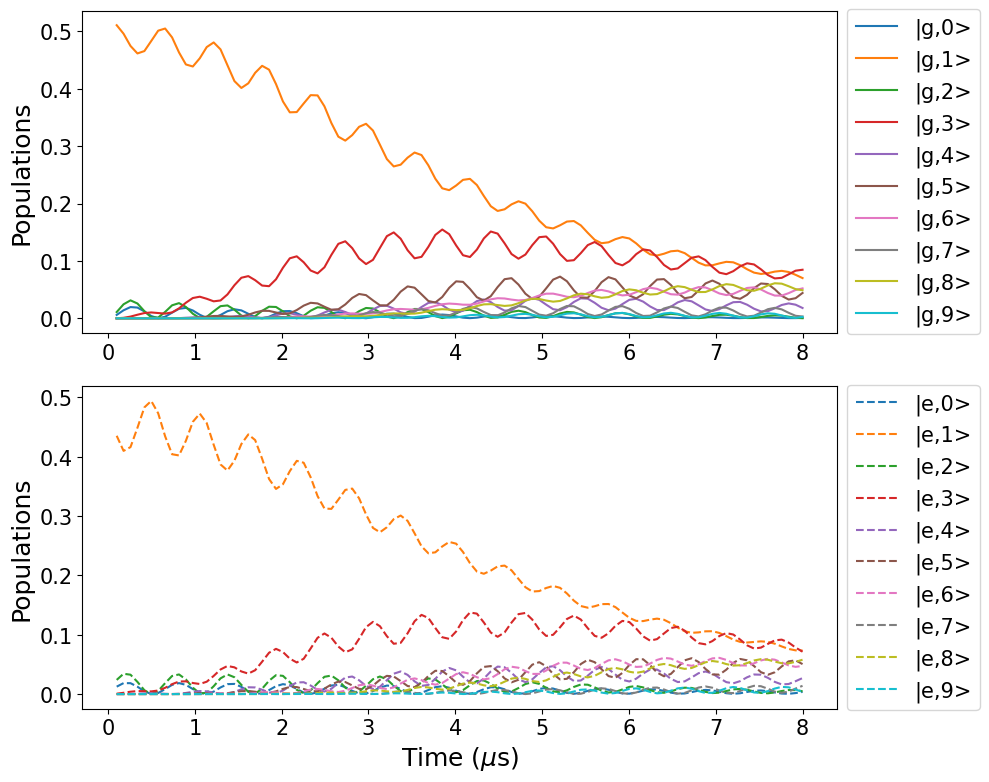

In [1050]:
plot_populations_single_mode(states, figname = 'test', title = None, times_on_plot = tws/1000)
plt.tight_layout()
plt.show()

# Resonant Heating and Cooling of resonator
I'll use the drive from https://www.nature.com/articles/nature19762 

In [1058]:
del_c1 = 0.04
Omega_q =0.04

In [1082]:
def cavity_drive(alpha = 2, tw = 100, delta = 0, phase = np.pi/2):
    '''
    tw is wait time 
    return a sinusoid
    '''

    ts = np.arange(0, tw, 1)
    wave =  -1.0j * alpha * np.sin(delta * ts + phase)
    
    return wave

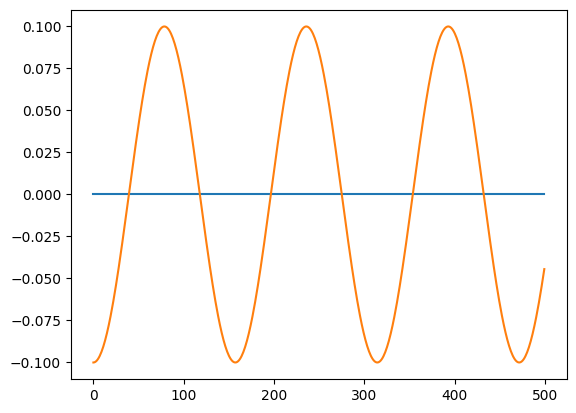

In [1095]:
pulse = cavity_drive(alpha = 0.1, tw = 500, delta = del_c1)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

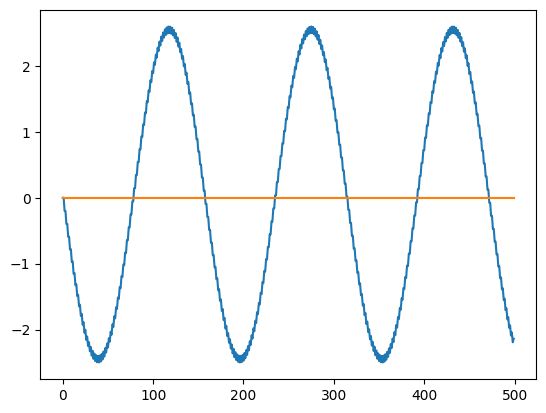

In [1096]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse, delta = 0)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.show()

In [1097]:
del_q = chi1 * alpha * np.conjugate(alpha)

H0 = (del_c1 * tensor(identity_q, num_c) + 
       #del_q * tensor(sigmaz(), identity_c )+ # ac stark shift 
     -1 * chi1 * tensor(sigmaz(), num_c) +
      1*Omega_q * tensor(sigmax(), identity_c)/2
)
# adding time dependent
H = [
    H0, 
    [tensor(identity_q, adag_c), pulse], 
    [tensor(identity_q, a_c), np.conjugate(pulse)], 
    [tensor(sigmaz(), identity_c ), del_q] # oscillating ac stark shift 
]

# SOlve Master equation 
T = len(pulse)
times = np.linspace(0, T, T)#, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(plus, basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

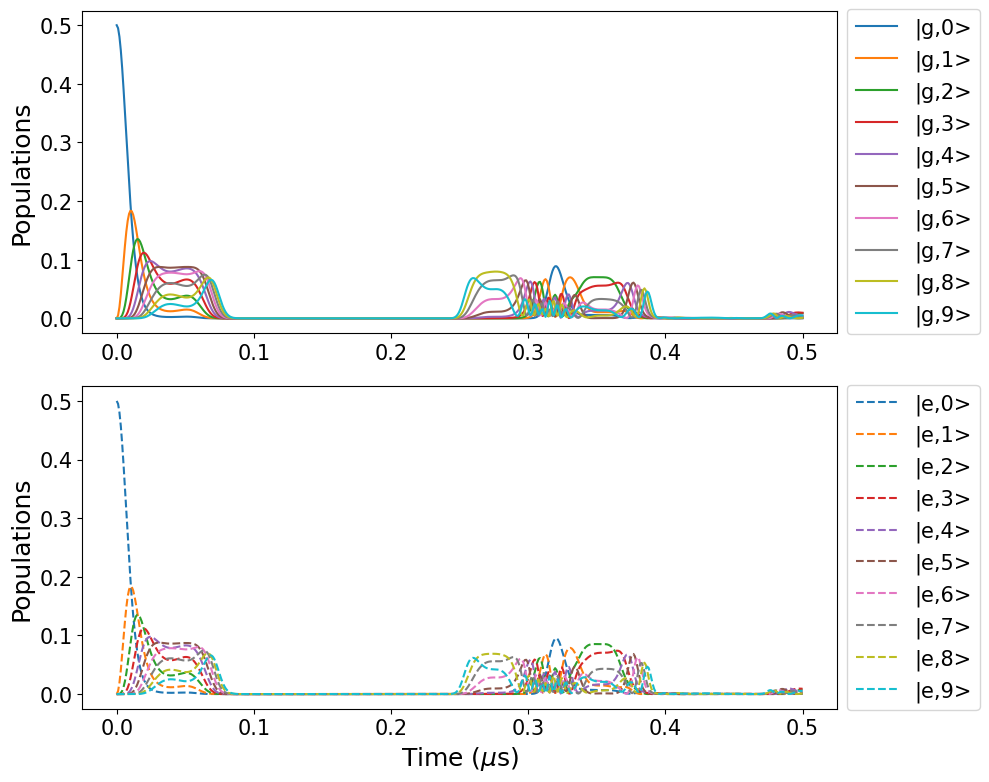

In [1098]:
data = qload(states_filename)
plot_populations_single_mode(data, figname = 'test', title = None, times_on_plot = times/1000)
plt.tight_layout()
plt.show()

In [1094]:
alpha[-1]

(-4.280675060885071+0j)

In [1085]:
def vary_tw(tws, target): 
    
    #fids = []
    states = []
    
    for tw in tws:
        # create pulse
        pulse = cavity_drive(alpha = 0.2, tw = tw, delta= del_c1)
        alpha =  alpha_from_epsilon_nonlinear_finite_difference(pulse, delta = del_c1)

        # ------------------------- Hamiltonian 
        del_q = chi1 * alpha * np.conjugate(alpha)

        H0 = (del_c1 * tensor(identity_q, num_c) + 
               #del_q * tensor(sigmaz(), identity_c )+ # ac stark shift 
             -1 * chi1 * tensor(sigmaz(), num_c) +
              Omega_q * tensor(sigmax(), identity_c)/2
        )
        # adding time dependent
        H = [
            H0, 
            [tensor(identity_q, adag_c), pulse], 
            [tensor(identity_q, a_c), np.conjugate(pulse)], 
            [tensor(sigmaz(), identity_c ), del_q] # oscillating ac stark shift 
        ]
    
        # SOlve Master equation 
        T = len(pulse)
        times = np.linspace(0, T, T)#, dtype = np.int32)

        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
        minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
        e_state = basis(n_q, 1)
        g_state = basis(n_q, 0)

        psi0 = tensor(minus, basis(n_c,1))
        opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
        output = mesolve(H, psi0 , times, c_ops, [], options =opts)
        states_filename = 'State_store_g0_g1_disp'
        qsave(output.states, states_filename)
        rho = output.states[-1]
        
        # find fidelity 
        #fids.append(get_fidelity(rho, target))
        states.append(rho)
    return states

In [1086]:
target = tensor(minus, basis(n_c, 1))
tws = np.linspace(100, 2000, 10, dtype = np.int32)
# fids = vary_tw(tws, target)
states = vary_tw(tws, target)

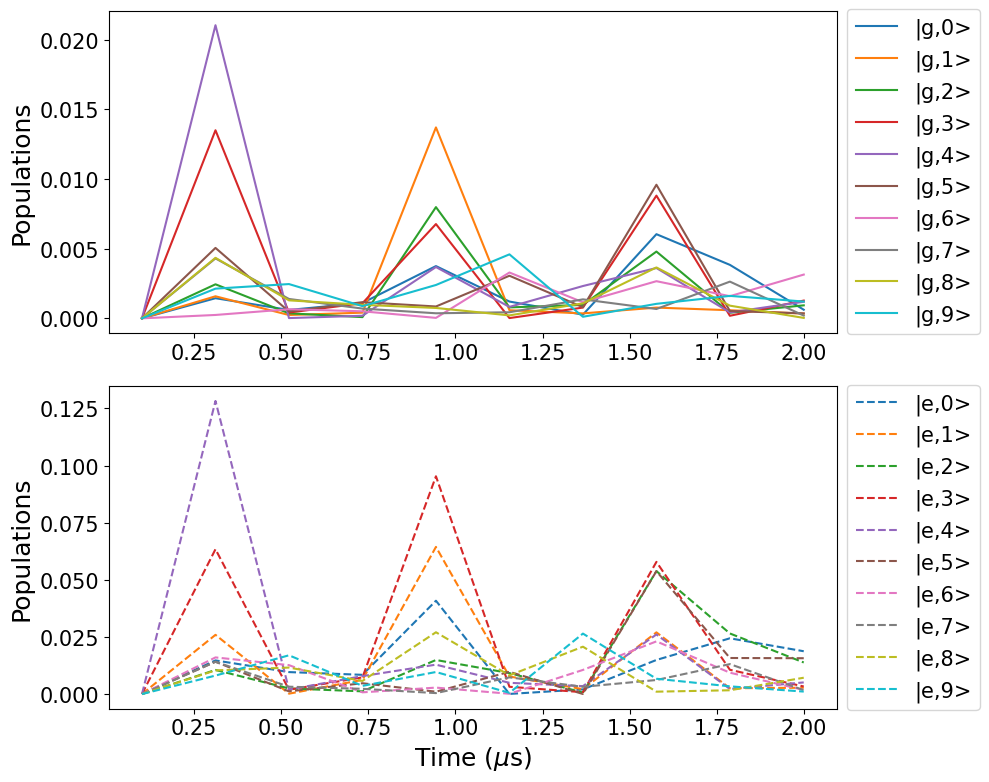

In [1087]:
plot_populations_single_mode(states, figname = 'test', title = None, times_on_plot = tws/1000)
plt.tight_layout()
plt.show()

Is it valid to be in the detuning frame when epsilon is off? Yes since qubit drive will counteract it 

In [830]:
del_c1

0.01

# Changing form of cavity drive to make alpha non-oscillatory in the middle
$$ H =  \Delta_c a^\dagger a  + \Delta_q \sigma_z /2 + \chi a^\dagger a \sigma_z + (\epsilon(t) a^\dagger + h.c.) + \Omega_q /2 \sigma_x$$
where detuning is the AC stark shift from the cavity drive

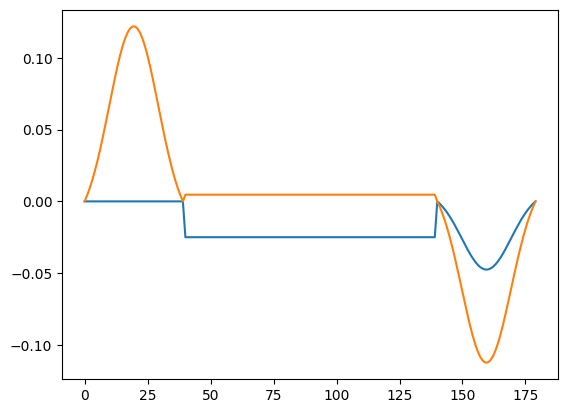

In [96]:
def cavity_drive(alpha = 2, omega_d = 0 , tw = 100, delta = 0):
    '''
    tw is wait time 
    pulse pattern - displace - wait - displace back
    '''

    ts = np.linspace(0, 40, 40)
    wave =  1.0j * alpha * norm_gaussian_wave(ts, omega_d)
    alpha0= max(alpha_from_epsilon_nonlinear_finite_difference(wave, delta = del_c1)) # **** should be alpha0[-1] not the max

    # pulse pattern - displace - wait - displace back
    disp =  wave.copy()
    wait = np.array([-1 * del_c1 * alpha0 for i in range(tw)])
    disp_back =  wave.copy() * -1 * np.exp(-1.0j * del_c1 * ( len(disp)))
    pulse = np.concatenate((disp, wait, disp_back))
    return pulse 
pulse = cavity_drive(alpha = 3)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

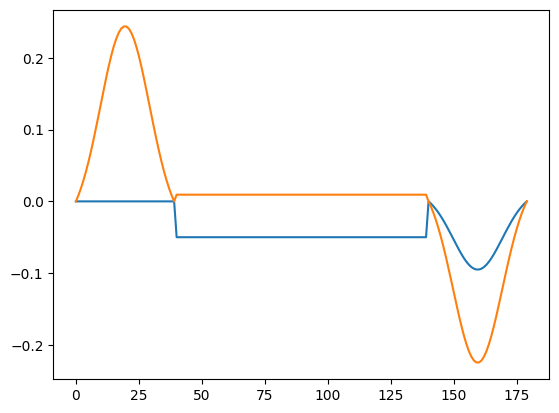

In [98]:
omega_c = 0
omega_q = 0
pulse = cavity_drive(alpha = 6, omega_d = 1 * omega_c, tw = 100, delta = del_c1)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

In [99]:
del_c1

0.01

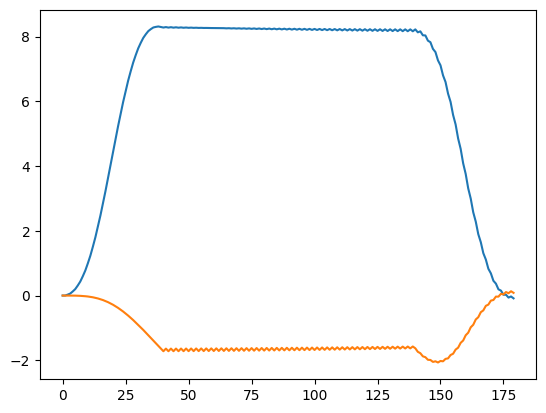

In [64]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse, delta = del_c1)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.show()

In [65]:
del_q = chi1 * alpha * np.conjugate(alpha)

H0 = (del_c1 * tensor(identity_q, num_c) + 
       #del_q * tensor(sigmaz(), identity_c )+ # ac stark shift 
     -1 * chi1 * tensor(sigmaz(), num_c) +
      +1*Omega_q * tensor(sigmax(), identity_c)/2
)
# adding time dependent
H = [
    H0, 
    [tensor(identity_q, adag_c), pulse], 
    [tensor(identity_q, a_c), np.conjugate(pulse)], 
    [tensor(sigmaz(), identity_c ), del_q] # oscillating ac stark shift 
]

# SOlve Master equation 
T = len(pulse)
times = np.linspace(0, T, T)#, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(plus, basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
c_ops = []
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

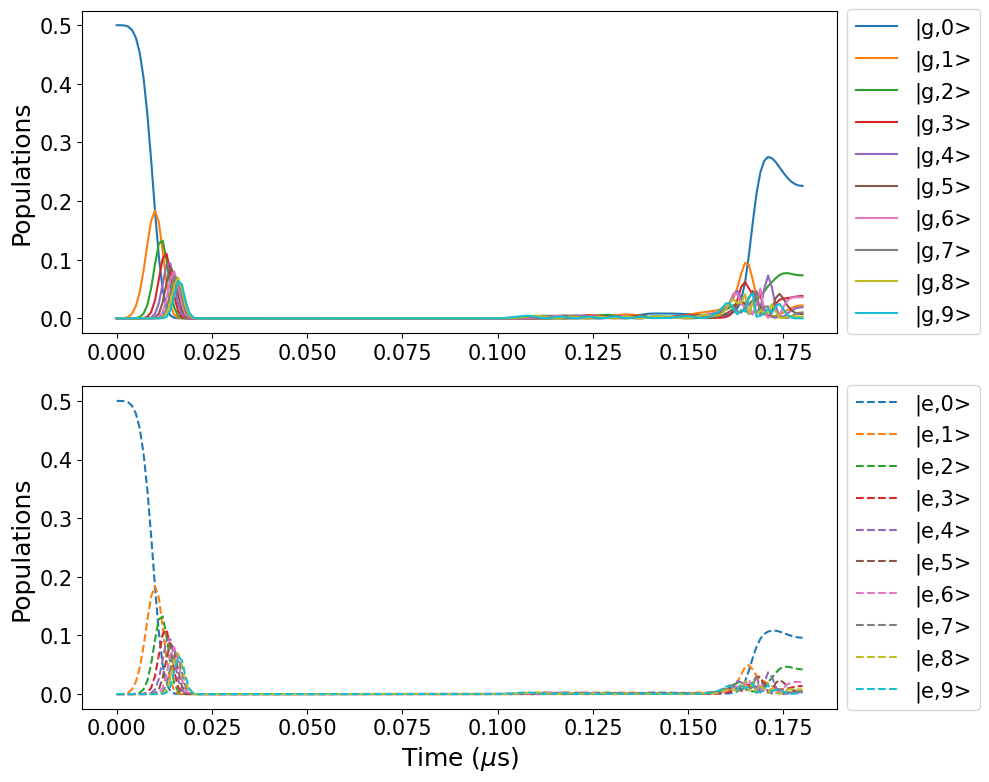

In [66]:
data = qload(states_filename)
plot_populations_single_mode(data, figname = 'test', title = None, times_on_plot = times/1000)
plt.tight_layout()
plt.show()

In [104]:
def vary_tw(tws, target): 
    
    #fids = []
    states = []
    
    for tw in tws:
        # create pulse
        pulse = cavity_drive(alpha = 6, omega_d = 1 * omega_c, tw = tw, delta= del_c1)
        alpha =  alpha_from_epsilon_nonlinear_finite_difference(pulse, delta = del_c1)

        # ------------------------- Hamiltonian 
        del_q = chi1 * alpha * np.conjugate(alpha)

        H0 = (del_c1 * tensor(identity_q, num_c) + 
               #del_q * tensor(sigmaz(), identity_c )+ # ac stark shift 
             -1 * chi1 * tensor(sigmaz(), num_c) +
              Omega_q * tensor(sigmax(), identity_c)/2
        )
        # adding time dependent
        H = [
            H0, 
            [tensor(identity_q, adag_c), pulse], 
            [tensor(identity_q, a_c), np.conjugate(pulse)], 
            [tensor(sigmaz(), identity_c ), del_q] # oscillating ac stark shift 
        ]
    
        # SOlve Master equation 
        T = len(pulse)
        times = np.linspace(0, T, T)#, dtype = np.int32)

        plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
        minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
        e_state = basis(n_q, 1)
        g_state = basis(n_q, 0)

        psi0 = tensor(minus, basis(n_c,0))
        opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
        output = mesolve(H, psi0 , times, c_ops, [], options =opts)
        states_filename = 'State_store_g0_g1_disp'
        qsave(output.states, states_filename)
        rho = output.states[-1]
        
        # find fidelity 
        #fids.append(get_fidelity(rho, target))
        states.append(rho)
    return states

In [105]:
target = tensor(minus, basis(n_c, 1))
tws = np.linspace(100, 2000, 50, dtype = np.int32)
# fids = vary_tw(tws, target)
states = vary_tw(tws, target)

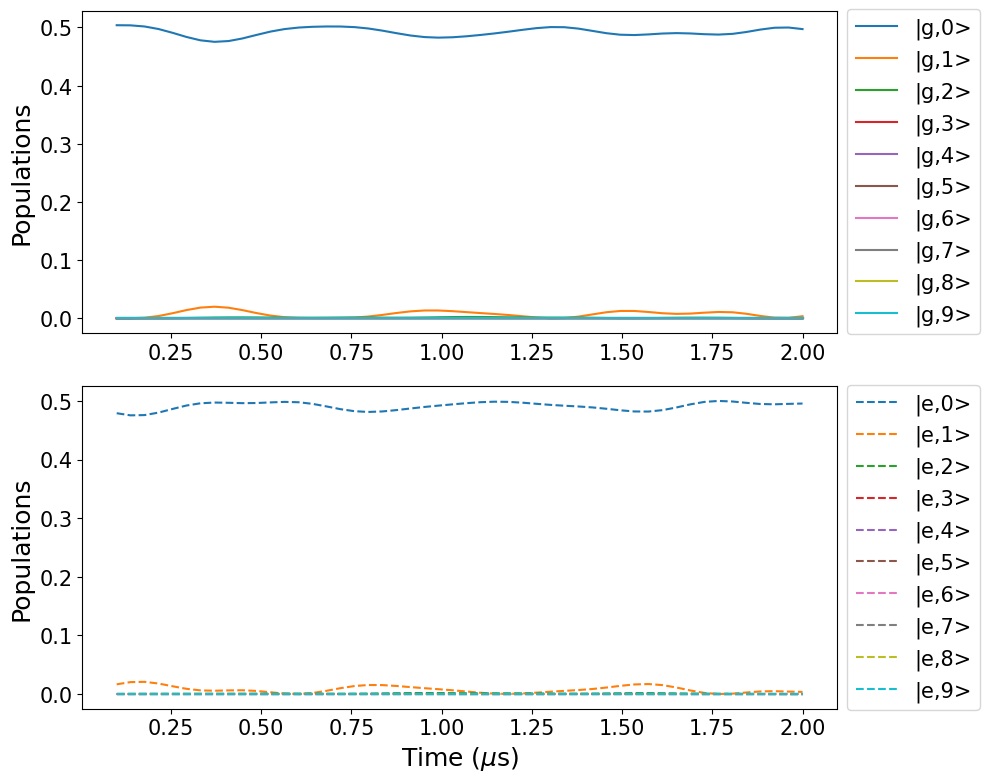

In [106]:
plot_populations_single_mode(states, figname = 'test', title = None, times_on_plot = tws/1000)
plt.tight_layout()
plt.show()

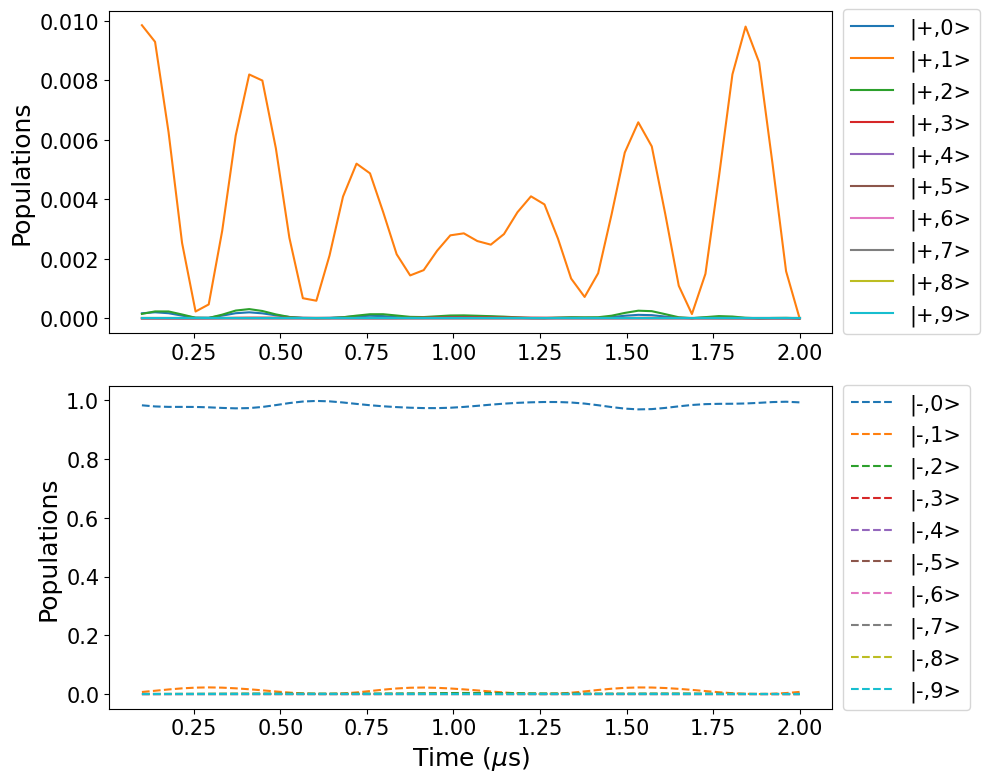

In [107]:
plot_populations_single_mode_plus_minus_basis(states, figname = 'test', title = None, times_on_plot = tws/1000)
plt.tight_layout()
plt.show()

# Suppose Displacement pulses were perfect

In [83]:
def cavity_drive(alpha = 2, alpha0 = 5, omega_d = 0 , tw = 100, delta = 0):
    '''
    tw is wait time 
    pulse pattern - displace - wait - displace back
    '''

    #ts = np.linspace(0, 40, 40)
    #wave =  1.0j * alpha * norm_gaussian_wave(ts, omega_d)
    #alpha0= alpha_from_epsilon_nonlinear_finite_difference(wave, delta = del_c1)[-1]
    
    # pulse pattern - displace - wait - displace back
    #disp =  wave.copy()
    wait = np.array([-1 * delta * alpha0 for i in range(tw)])
    #disp_back =  wave.copy() * -1 * np.exp(-1.0j * delta * ( len(disp)))
    pulse = wait#np.concatenate(( wait))
    return pulse 

In [84]:
alpha0 = 5+0.0j

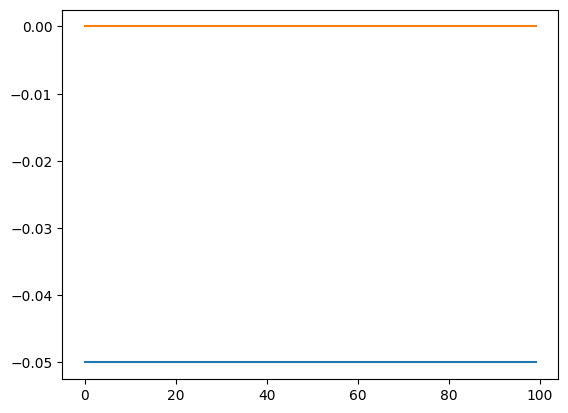

In [85]:
pulse = cavity_drive(alpha = None, alpha0 = alpha0, omega_d = 0, tw = 100, delta = del_c1)
plt.plot(pulse.real)
plt.plot(pulse.imag)
plt.show()

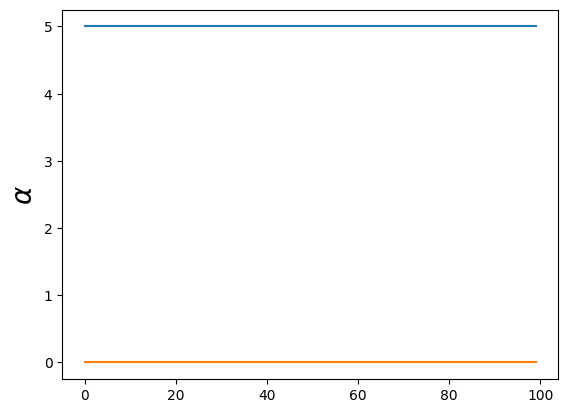

In [86]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(pulse, delta =del_c1, alpha_init = alpha0)
plt.plot(alpha.real)
plt.plot(alpha.imag)
plt.ylabel(r'$\alpha$', fontsize = 20)
plt.show()

In [87]:
# del_c1 = 10 * 1e-03
# dec_c2 = 10 * 1e-03
# Omega_q = 11 * 1e-03

In [88]:
tw = 2000
alpha0 = 5 + 0.0j
# Drives 
pulse1 = cavity_drive(alpha = None, alpha0 = alpha0, omega_d = 0, tw = tw, delta = del_c1)
#pulse2 = cavity_drive(alpha = None, alpha0 = alpha0, omega_d = 0, tw = tw, delta = del_c2)

alpha1 = alpha_from_epsilon_nonlinear_finite_difference(pulse1, delta =del_c1, alpha_init = alpha0)
#alpha2 = alpha_from_epsilon_nonlinear_finite_difference(pulse2, delta =del_c2, alpha_init = alpha0)


In [89]:
Omega_q

0.01

In [90]:
del_q = chi1 * alpha1 * np.conjugate(alpha1)

H0 = (del_c1 * tensor(identity_q, num_c) + 
       #del_q * tensor(sigmaz(), identity_c )+ # ac stark shift 
     -1 * chi1 * tensor(sigmaz(), num_c) +
      +1*Omega_q * tensor(sigmax(), identity_c)/2
)
# adding time dependent
H = [
    H0, 
    [tensor(identity_q, adag_c), pulse1], 
    [tensor(identity_q, a_c), np.conjugate(pulse1)], 
    [tensor(sigmaz(), identity_c ), del_q] # oscillating ac stark shift 
]

# SOlve Master equation 
T = len(pulse1)
times = np.linspace(0, T, T)#, dtype = np.int32)

plus = (basis(n_q, 0 ) + basis(n_q, 1)) / np.sqrt(2)
minus = (basis(n_q, 0 ) - basis(n_q, 1)) / np.sqrt(2)
e_state = basis(n_q, 1)
g_state = basis(n_q, 0)

psi0 = tensor(minus, basis(n_c, 1))
# perfect displacement
psi0 = tensor(identity_q, displace(n_c, alpha0)) * psi0
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
c_ops = []
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
states_filename = 'State_store_g0_g1_disp'
qsave(output.states, states_filename)
rho = output.states[-1]

In [91]:
# perfect displacement back 
alpha_back = -1 * alpha0
rho_back = tensor(identity_q,  displace(n_c, alpha_back)) * output.states[-1]

In [92]:
# new_states = []
# for state in output.states: 
#     n_state = tensor(identity_q, displace(n_c, alpha_back), displace(n_c, alpha_back)) * state
#     new_states.append(n_state)

In [93]:
# plot_populations(new_states, figname = 'test')
# plt.show()

In [94]:
#sample evey n'th state 
sampled_states = []

n = 0
i = 0
while (i < len(output.states)): 
    n+=1
    if n==50: 
        print('i')
        n=0 
        samp_state = tensor(identity_q,  displace(n_c, alpha_back)) * output.states[i]
        sampled_states.append(samp_state)
    i+=1
len(sampled_states)

i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i
i


40

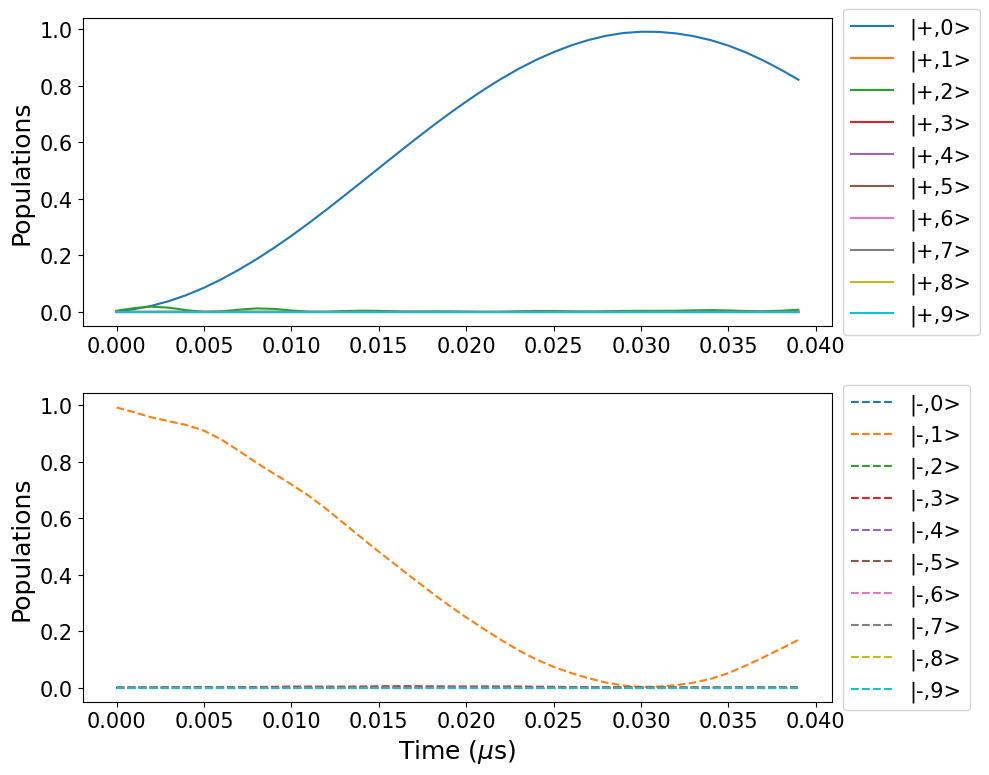

In [95]:
plot_populations_single_mode_plus_minus_basis(sampled_states, figname = 'test', title = None)
plt.show()

c:\Users\Eesh Gupta\anaconda\envs\base_stanford\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Eesh Gupta\anaconda\envs\base_stanford\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


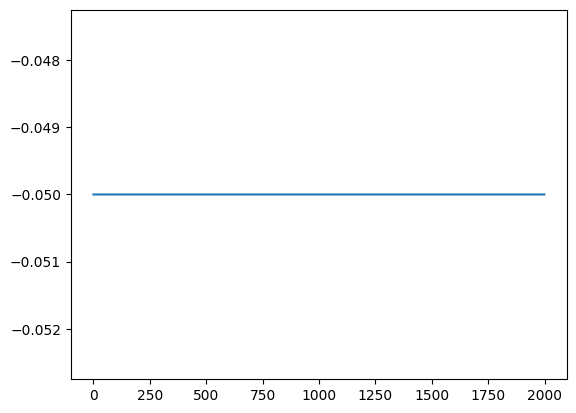

In [32]:
plt.plot(pulse1)

In [34]:
del_c1

0.01

# Dump

In [ ]:
c

In [ ]:
target = tensor(plus, basis(n_c, 0))
ts = np.linspace(0, len(output.states), len(output.states))
fids = []
for idx, t in enumerate(ts):
    fids.append(get_fidelity(output.states[idx], target))

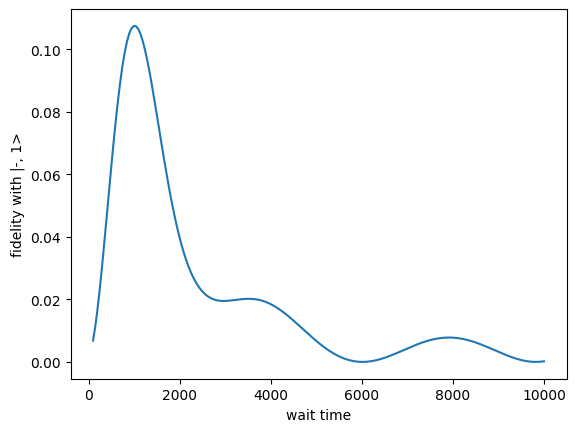

In [804]:
plt.plot(tws, fids)
plt.ylabel('fidelity with |-, 1>')
plt.xlabel('wait time')
plt.show()